In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understanding the Dataset Structure

In [5]:
# Load the CSV file into a DataFrame
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')
df_goodreads.head()

,ID,Author,Title,URL,SeriesName,Summary,Genres,Score,RatingsCount,ReviewsCount,Pages,PublishedDate,Popularity_ReadingNow,Popularity_Wishlisted
0,35053870,sarina bowen,brooklynaire,https://www.goodreads.com/book/show/35053870-b...,Brooklyn Bruisers #4,"You’d think a billion dollars, a professional ...","Romance, Sports, Sports Romance, Contemporary,...",4.07,20705,2322,298,2018-02-12,2261,13100
1,28869598,sarina bowen,hard hitter,https://www.goodreads.com/book/show/28869598-h...,Brooklyn Bruisers #2,"He’s a fighter in the rink, but he’s about to ...","Romance, Sports, Sports Romance, Contemporary,...",4.05,10818,1049,336,2017-01-03,495,5907
2,30627346,sarina bowen,pipe dreams,https://www.goodreads.com/book/show/30627346-p...,Brooklyn Bruisers #3,"A goalie has to trust his instincts, even when...","Romance, Sports, Sports Romance, Contemporary,...",3.92,9532,975,336,2017-05-02,348,5180
3,17561022,j. clare,stranded with a billionaire,https://www.goodreads.com/book/show/17561022-s...,Billionaire Boys Club #1,The Billionaire Boys Club is a secret society ...,"Romance, Contemporary Romance, Contemporary, E...",3.82,14878,1009,215,2013-04-16,335,8684
4,43728457,j. clare,beauty and the billionaire,https://www.goodreads.com/book/show/43728457-b...,Dirty Fairy Tales #1,Ruthless Bastard. White Knight. But I just cal...,"Romance, Contemporary, Contemporary Romance, E...",3.85,9954,691,336,2019-01-27,15700,7770


In [6]:
# Step 1: Inspect Data Dimensions

# Check the shape of the DataFrame
num_rows, num_columns = df_goodreads.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 105 rows and 14 columns.


In [7]:
# Step 2: Check Data Types and Missing Values

# Display data types of each column
print("Data types of each column:\n")
print(df_goodreads.dtypes)

# Check for missing values in each column
print("\nNumber of missing values in each column:\n")
print(df_goodreads.isnull().sum())

Data types of each column:

ID                         int64
Author                    object
Title                     object
URL                       object
SeriesName                object
Summary                   object
Genres                    object
Score                    float64
RatingsCount               int64
ReviewsCount               int64
Pages                      int64
PublishedDate             object
Popularity_ReadingNow      int64
Popularity_Wishlisted      int64
dtype: object

Number of missing values in each column:

ID                       0
Author                   0
Title                    0
URL                      0
SeriesName               0
Summary                  0
Genres                   0
Score                    0
RatingsCount             0
ReviewsCount             0
Pages                    0
PublishedDate            0
Popularity_ReadingNow    0
Popularity_Wishlisted    0
dtype: int64


In [8]:
# Convert 'PublishedDate' to datetime
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')

# Process 'Genres' column: split by comma and strip whitespace
df_goodreads['Genres'] = df_goodreads['Genres'].apply(lambda x: [genre.strip() for genre in str(x).split(',')])

# Optional: Explode 'Genres' to create a separate DataFrame with one genre per row
df_genres = df_goodreads.explode('Genres')

# Verify conversions and check for missing values
print("Data type of 'PublishedDate' after conversion:", df_goodreads['PublishedDate'].dtype)
print("\nFirst few entries of 'Genres' after processing:")
print(df_goodreads['Genres'].head())

# Check for missing values in 'PublishedDate'
missing_dates = df_goodreads['PublishedDate'].isnull().sum()
print(f"\nMissing values in 'PublishedDate' after conversion: {missing_dates}")

# Verify data types after conversions
print("\nData types after conversions:\n")
print(df_goodreads.dtypes)

Data type of 'PublishedDate' after conversion: datetime64[ns]

First few entries of 'Genres' after processing:
0    [Romance, Sports, Sports Romance, Contemporary...
1    [Romance, Sports, Sports Romance, Contemporary...
2    [Romance, Sports, Sports Romance, Contemporary...
3    [Romance, Contemporary Romance, Contemporary, ...
4    [Romance, Contemporary, Contemporary Romance, ...
Name: Genres, dtype: object

Missing values in 'PublishedDate' after conversion: 0

Data types after conversions:

ID                                int64
Author                           object
Title                            object
URL                              object
SeriesName                       object
Summary                          object
Genres                           object
Score                           float64
RatingsCount                      int64
ReviewsCount                      int64
Pages                             int64
PublishedDate            datetime64[ns]
Popularity_ReadingN

# 2. Descriptive Statistics of Numerical Variables

In [9]:
# Step 4: Descriptive Statistics of Numerical Variables

# Select the numerical columns
numerical_cols = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Compute descriptive statistics
numerical_stats = df_goodreads[numerical_cols].describe()

# Display the summary statistics
print("Descriptive Statistics of Numerical Variables:\n")
print(numerical_stats)

Descriptive Statistics of Numerical Variables:

            Score   RatingsCount  ReviewsCount       Pages  \
count  105.000000     105.000000    105.000000  105.000000   
mean     3.989333   39644.609524   3548.209524  311.809524   
std      0.212156  105271.499904   9898.746074  108.288885   
min      3.260000     146.000000     25.000000   72.000000   
25%      3.860000    3227.000000    339.000000  244.000000   
50%      4.010000   11558.000000    975.000000  336.000000   
75%      4.140000   30630.000000   2474.000000  382.000000   
max      4.470000  929884.000000  86584.000000  530.000000   

       Popularity_ReadingNow  Popularity_Wishlisted  
count             105.000000             105.000000  
mean             4666.076190           28911.761905  
std              7767.053573           71029.711510  
min                 0.000000              40.000000  
25%               436.000000            1451.000000  
50%              1867.000000            5482.000000  
75%            

# Visualization of Distributions

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# A. Visualization of Popularity-Related and Appreciation-Related Variables

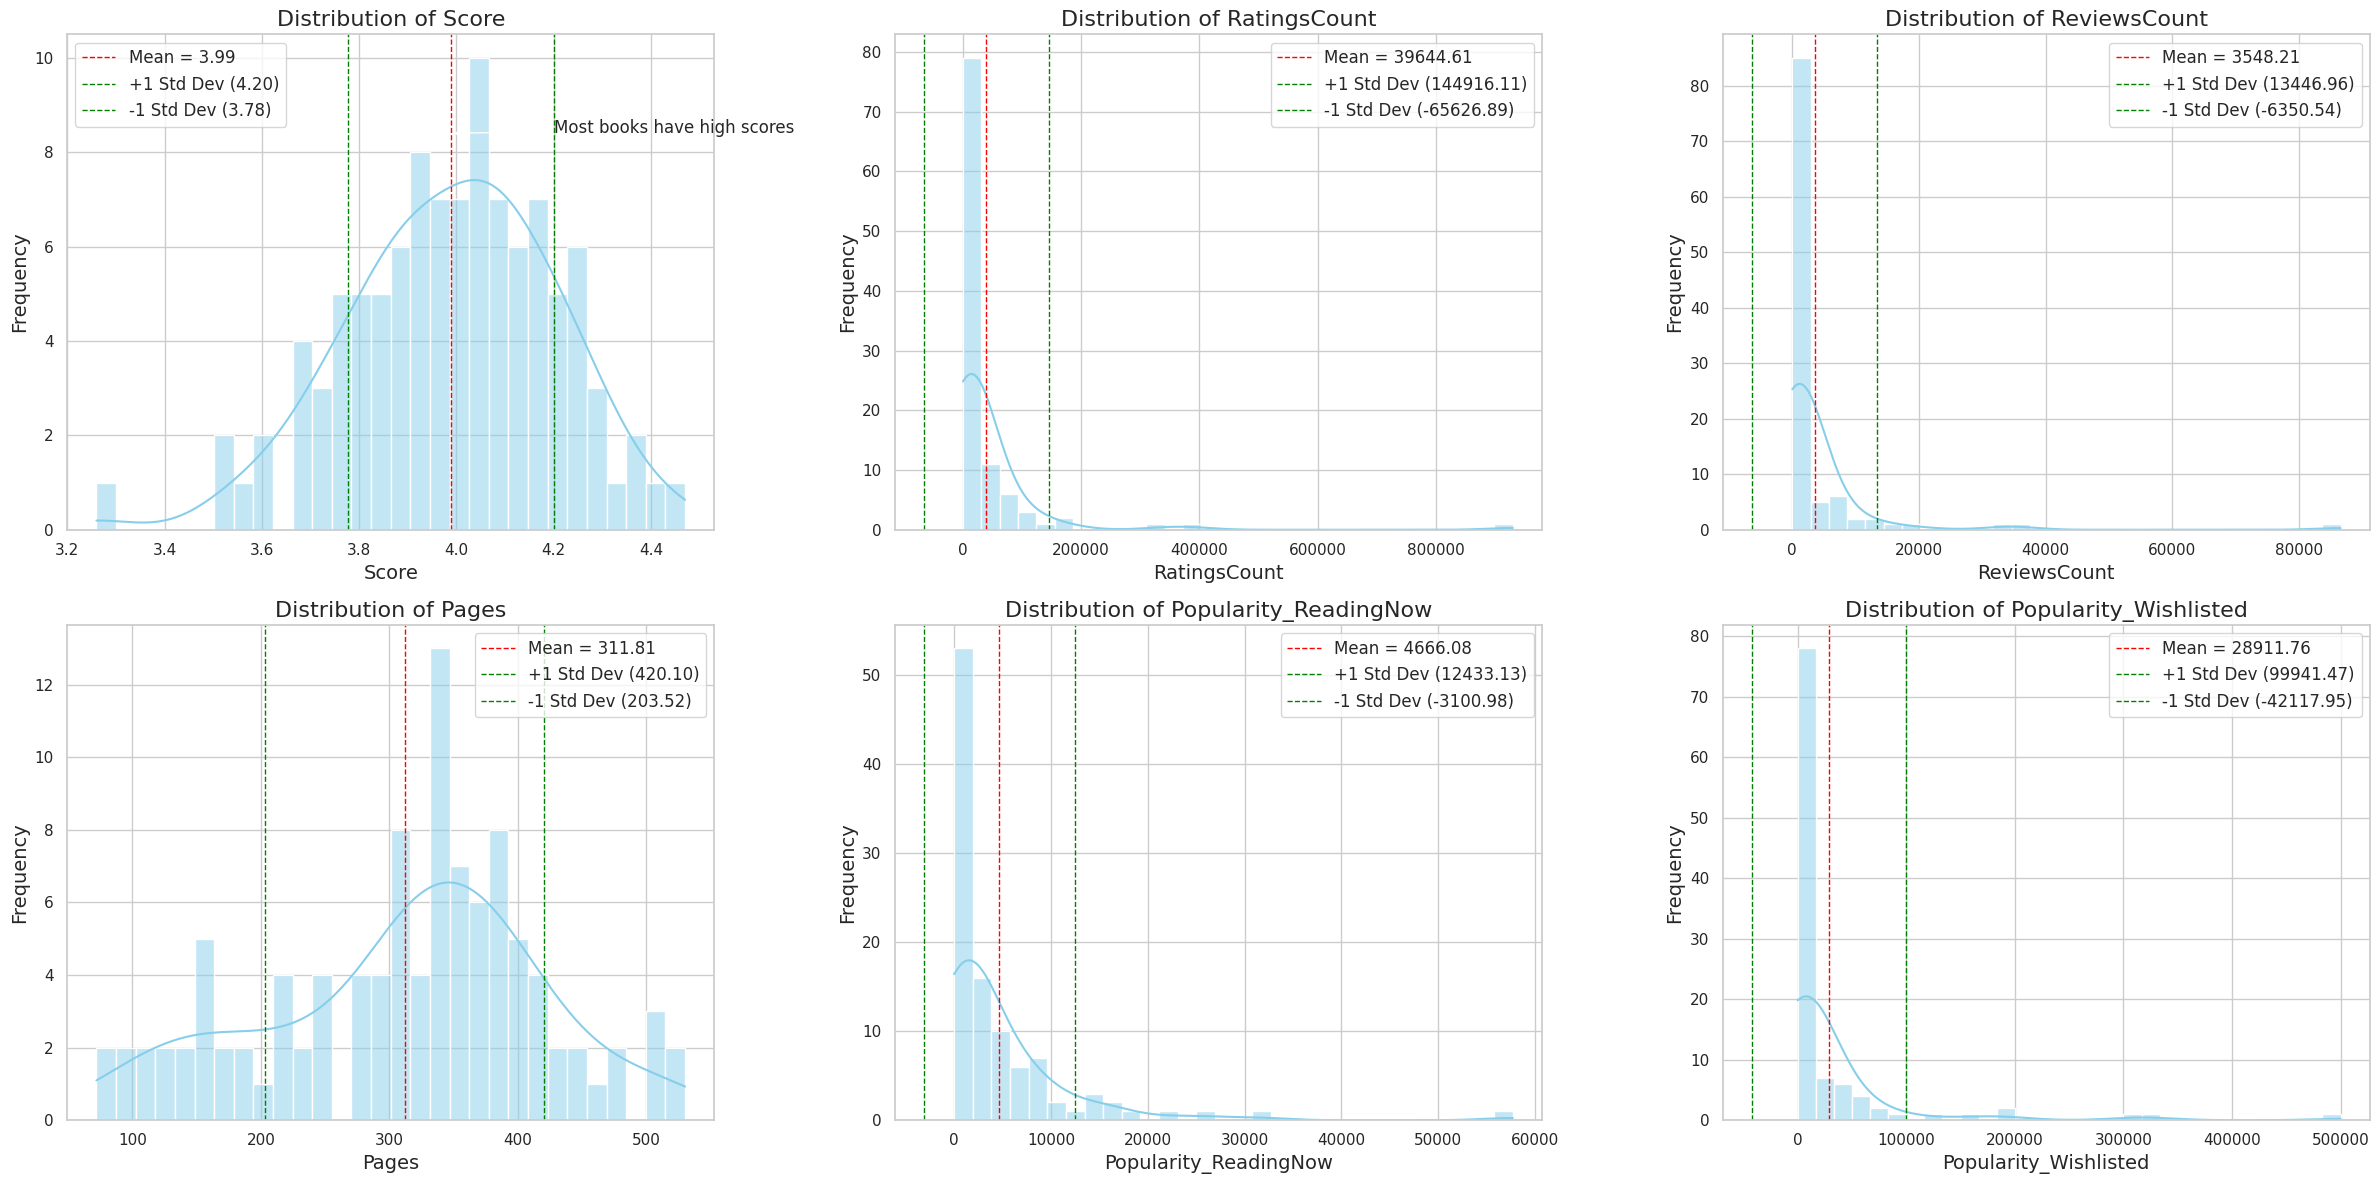

In [11]:
# Combined Visualization of Numerical Variables (Without Log Transformation)

# Define the list of numerical variables (excluding PublishedYear for now if it's absent)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Plot histogram and KDE
    sns.histplot(df_goodreads[var], bins=30, kde=True, color='skyblue', ax=ax)

    # Calculate mean and standard deviation
    mean = df_goodreads[var].mean()
    std = df_goodreads[var].std()

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels
    ax.set_title(f'Distribution of {var}', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12)

    # Optional annotations
    if var == 'Score':
        ax.annotate('Most books have high scores', xy=(mean, ax.get_ylim()[1]*0.8),
                    xytext=(mean + std, ax.get_ylim()[1]*0.8),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the combined figure
plt.show()


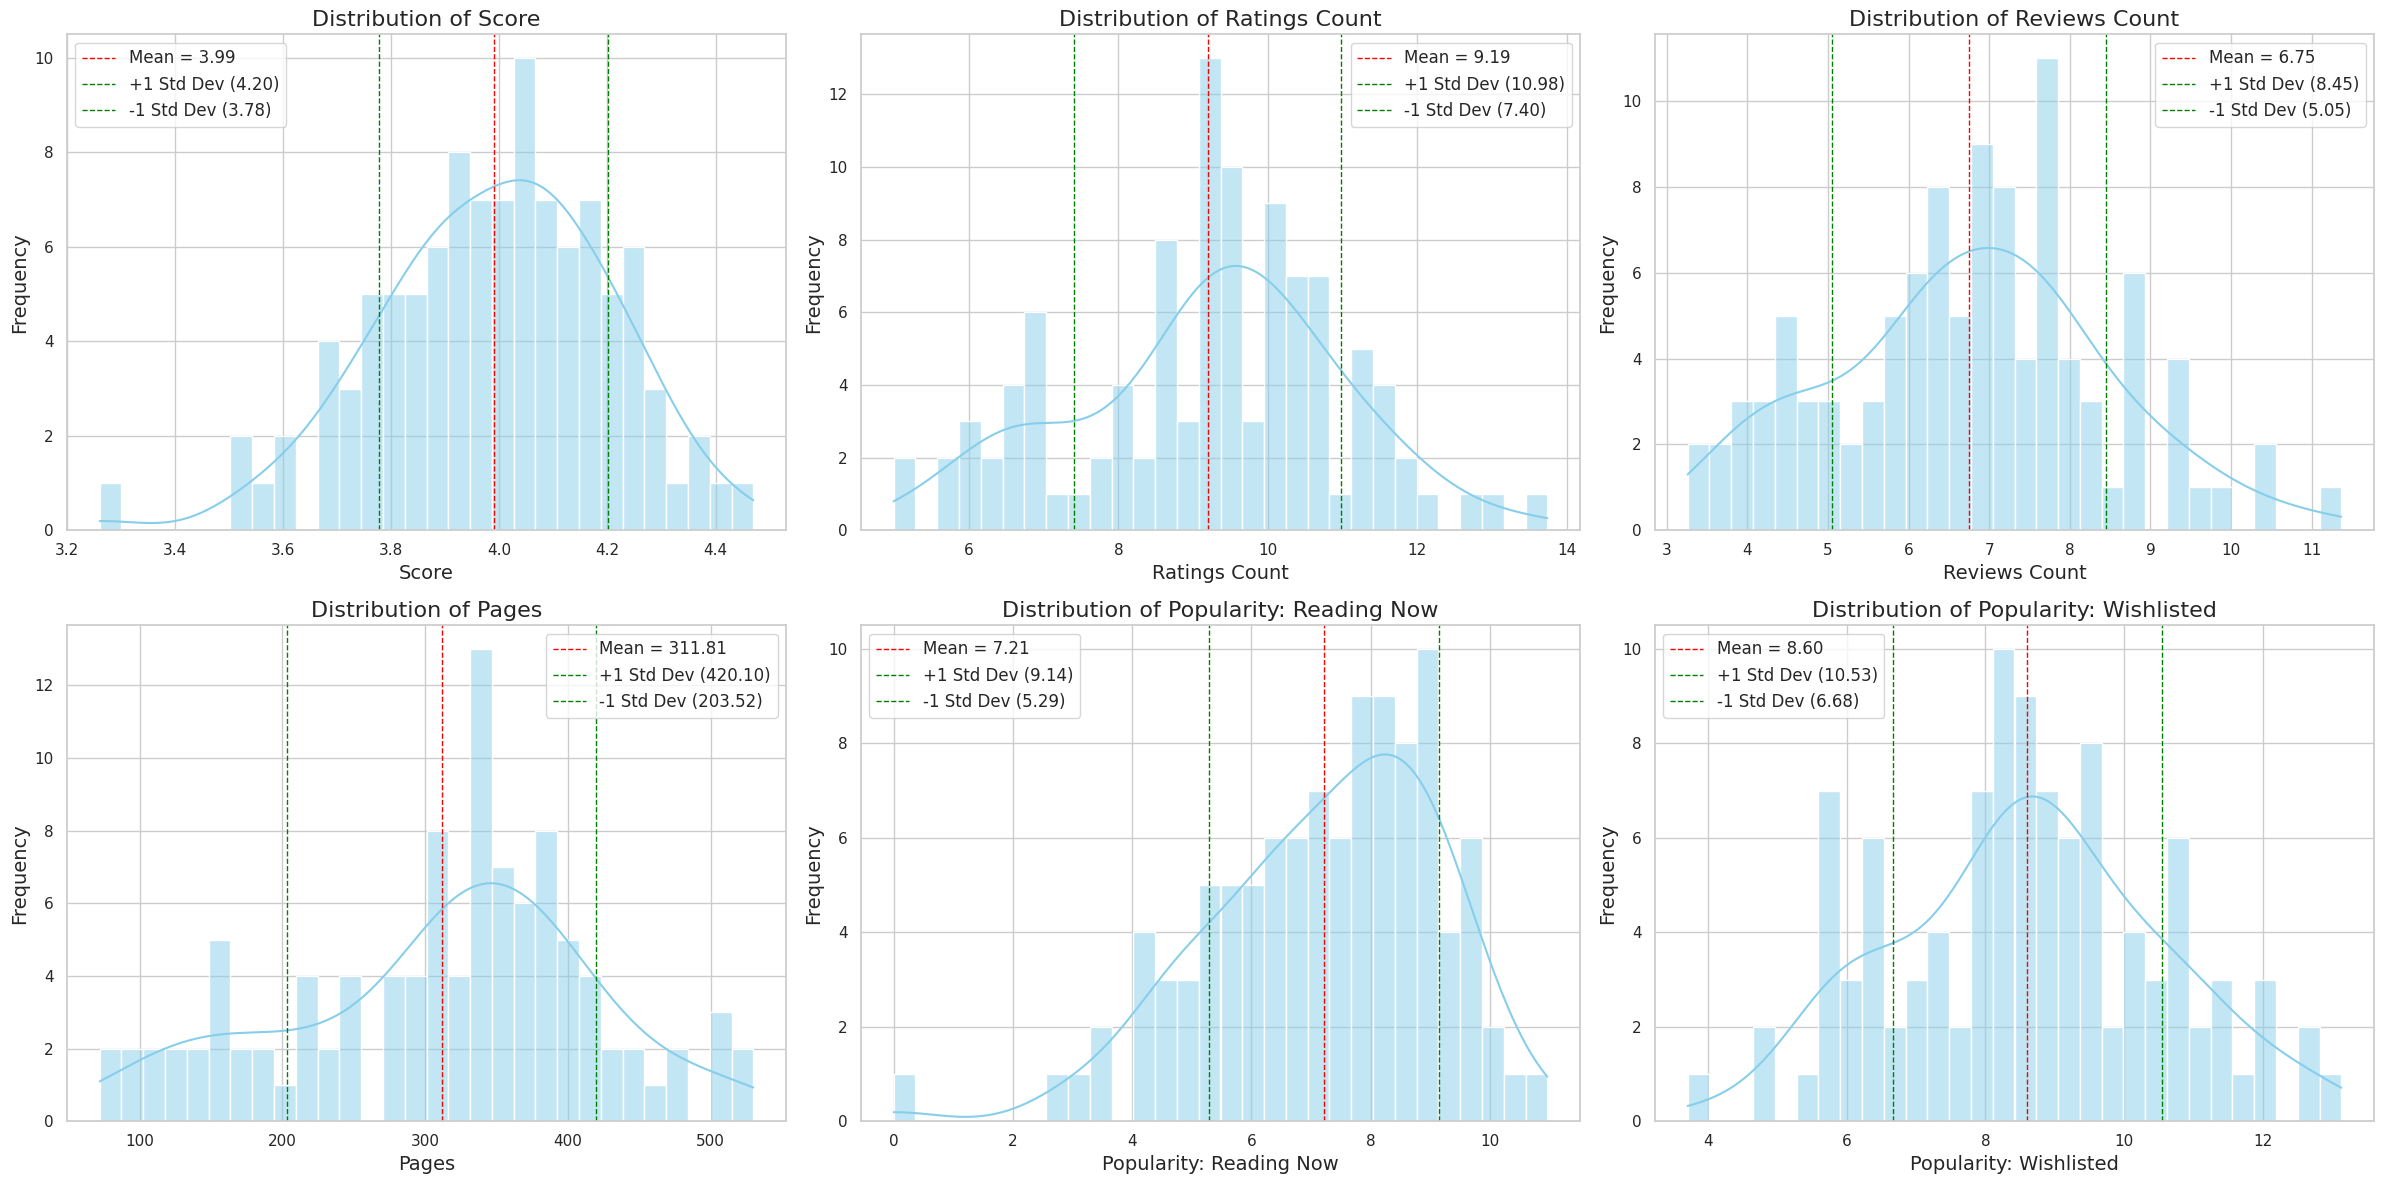

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of numerical variables (use original names in the DataFrame)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages'
}

# Define log-transformed variables for skewed data
log_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Apply log transformation to skewed variables
    if var in log_vars:
        data = np.log1p(df_goodreads[var])  # Apply log1p to avoid issues with zero values
    else:
        data = df_goodreads[var]

    # Get the display name for the variable
    title_var = name_mapping[var]

    # Plot histogram and KDE
    sns.histplot(data, bins=30, kde=True, color='skyblue', ax=ax)

    # Calculate mean and standard deviation
    mean = data.mean()
    std = data.std()

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels
    ax.set_title(f'Distribution of {title_var}', fontsize=16)
    ax.set_xlabel(title_var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend with dynamic placement
    ax.legend(fontsize=12, loc='best')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the combined figure
plt.show()

# B. Visualization of Additional Variables

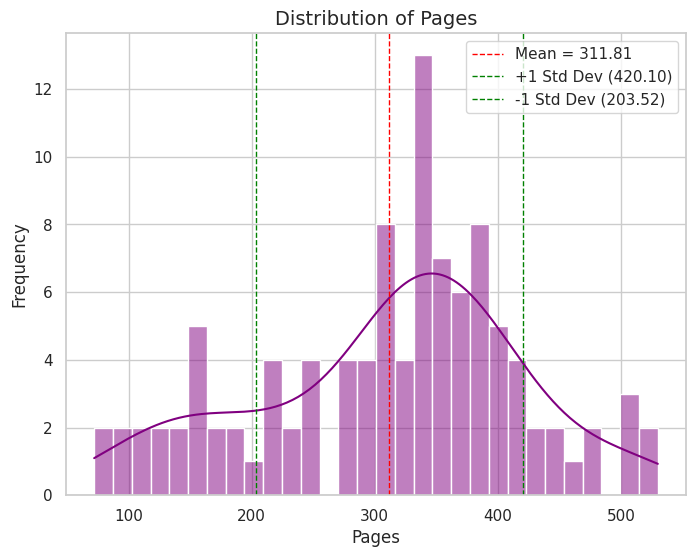

In [13]:
# Distribution of 'Pages'
plt.figure(figsize=(8,6))
sns.histplot(df_goodreads['Pages'], bins=30, kde=True, color='purple')
mean_pages = df_goodreads['Pages'].mean()
std_pages = df_goodreads['Pages'].std()
plt.axvline(mean_pages, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_pages:.2f}')
plt.axvline(mean_pages + std_pages, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean_pages + std_pages:.2f})')
plt.axvline(mean_pages - std_pages, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean_pages - std_pages:.2f})')
plt.title('Distribution of Pages', fontsize=14)
plt.xlabel('Pages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

Data type before conversion: datetime64[ns]
Data type after conversion: datetime64[ns]
Number of missing dates after conversion: 0


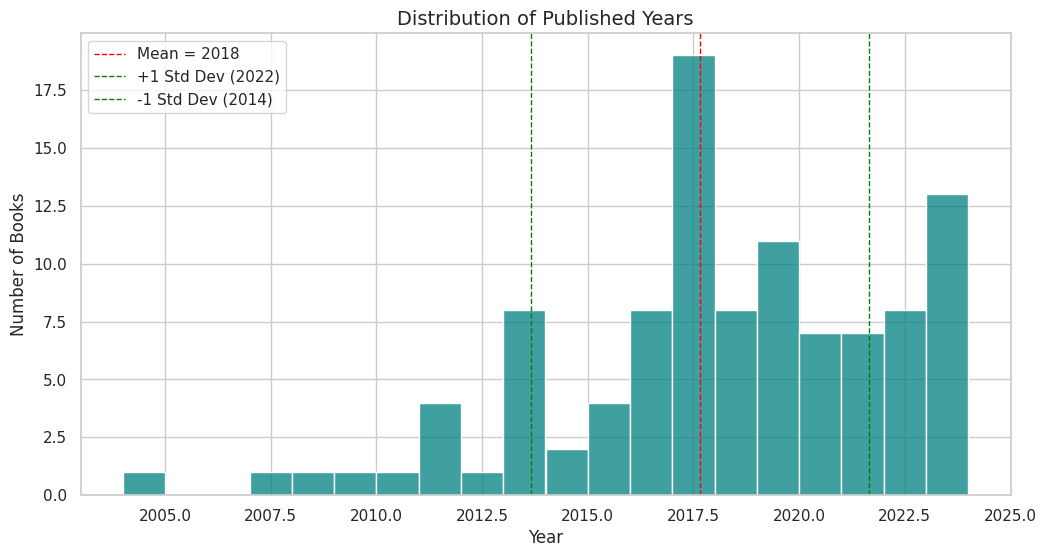

In [14]:
# Step 1: Check the data type of 'PublishedDate'
print("Data type before conversion:", df_goodreads['PublishedDate'].dtype)

# Step 2: Convert 'PublishedDate' to datetime
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')

# Step 3: Verify the conversion
print("Data type after conversion:", df_goodreads['PublishedDate'].dtype)

# Step 4: Check for missing values after conversion
missing_dates = df_goodreads['PublishedDate'].isnull().sum()
print(f"Number of missing dates after conversion: {missing_dates}")

# (Optional) Handle missing dates
# For example, you can drop rows with missing 'PublishedDate'
# df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Step 5: Extract the publication year
df_goodreads['PublishedYear'] = df_goodreads['PublishedDate'].dt.year

# Step 6: Proceed with your plotting code
mean_year = df_goodreads['PublishedYear'].mean()
std_year = df_goodreads['PublishedYear'].std()

plt.figure(figsize=(12,6))
sns.histplot(df_goodreads['PublishedYear'], bins=20, kde=False, color='teal')

plt.axvline(mean_year, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_year:.0f}')
plt.axvline(mean_year + std_year, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean_year + std_year:.0f})')
plt.axvline(mean_year - std_year, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean_year - std_year:.0f})')

plt.title('Distribution of Published Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.legend()
plt.show()

# Outlier Analysis

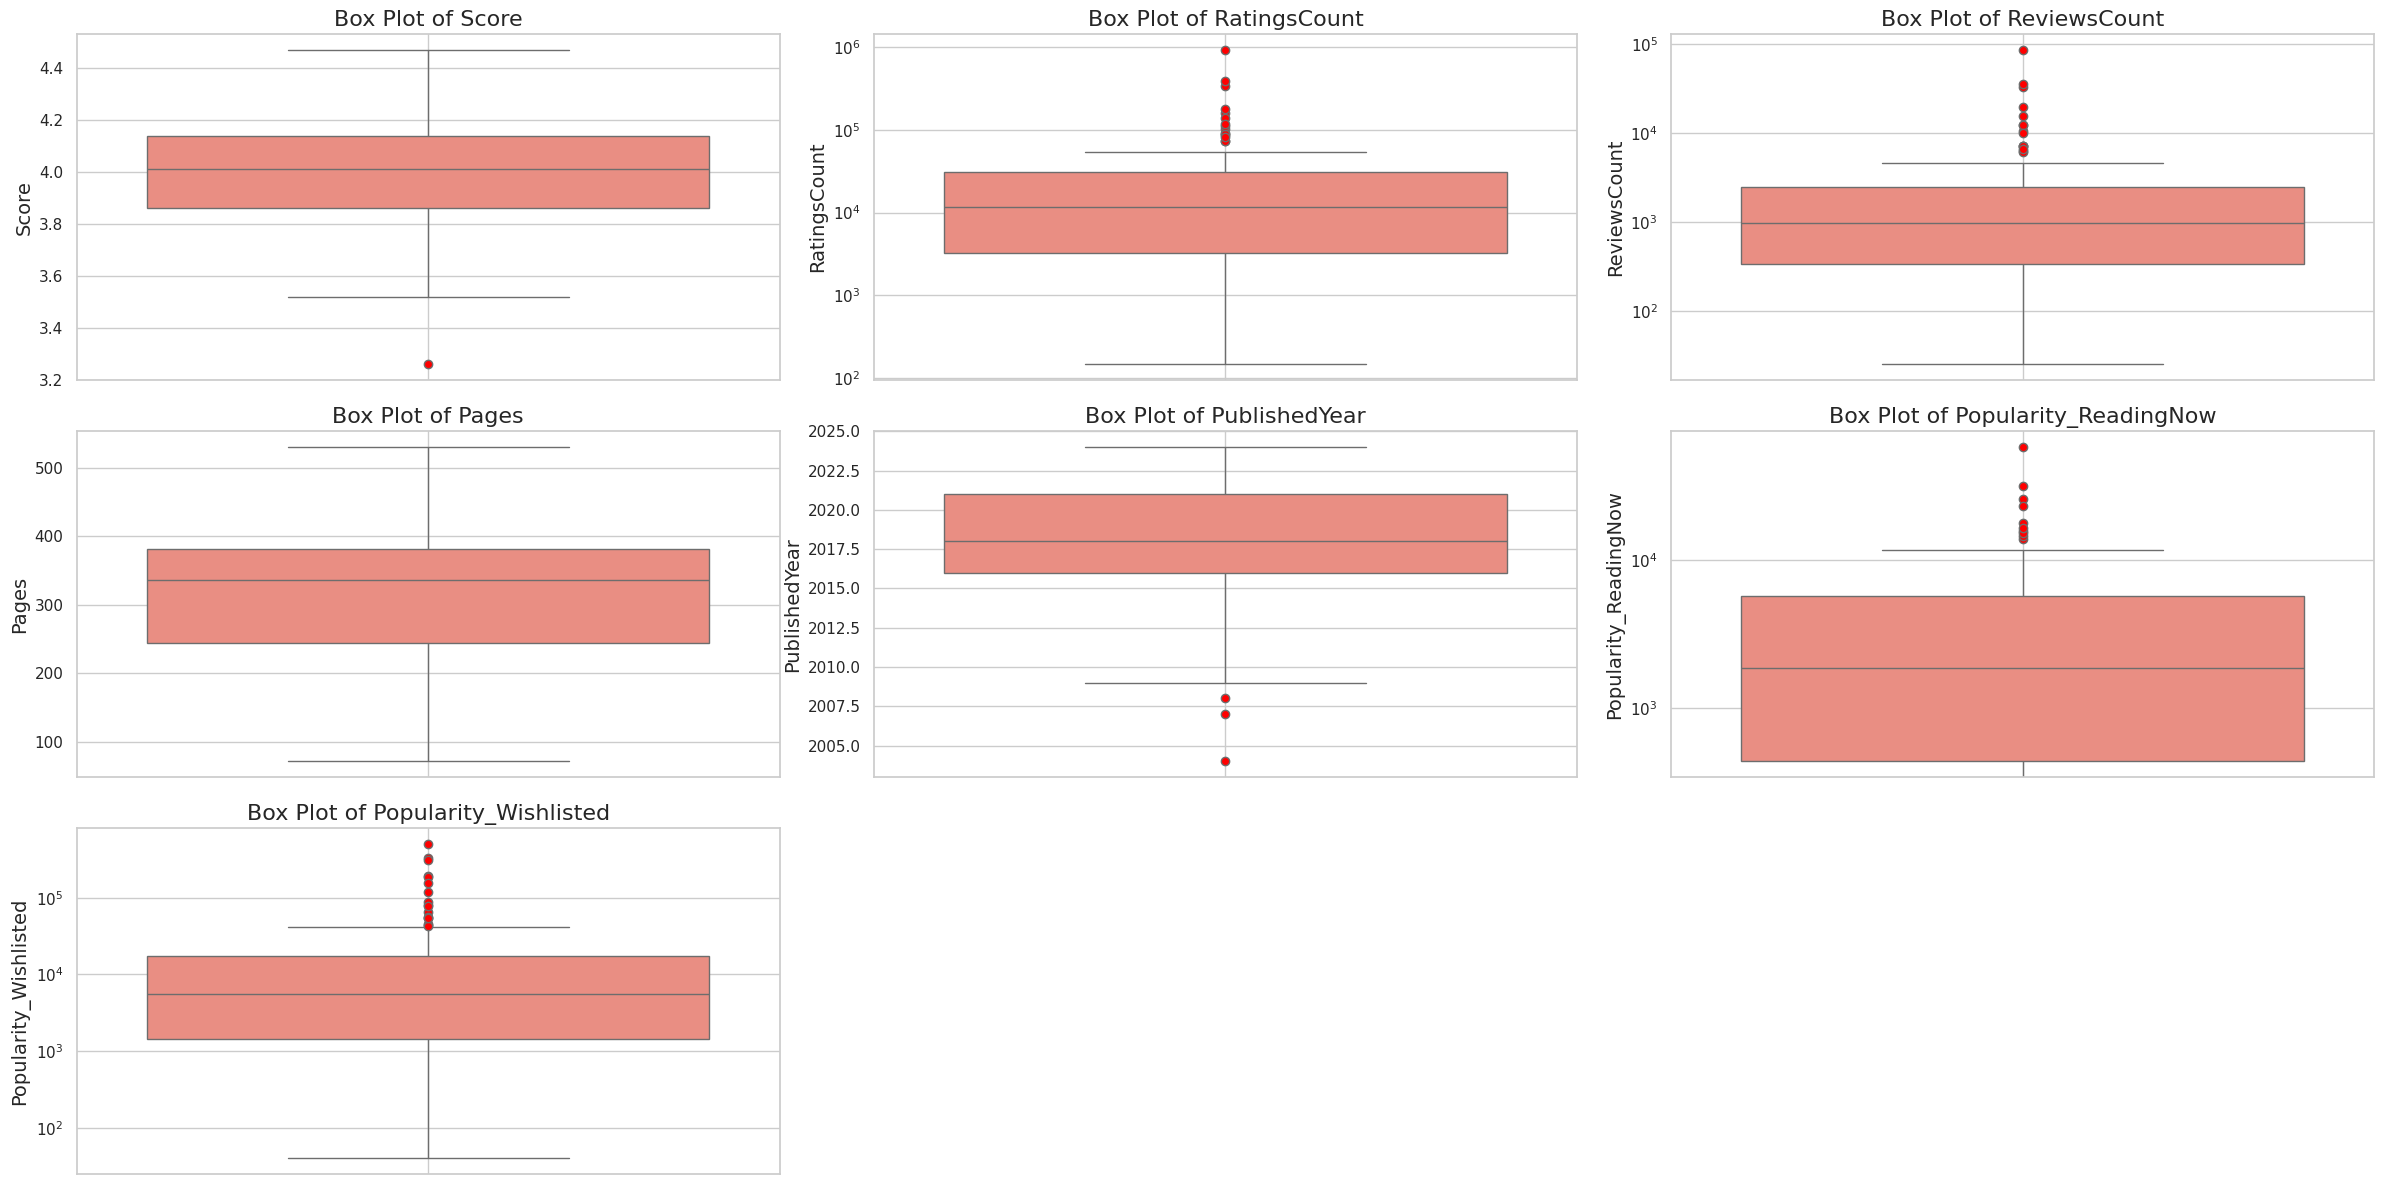

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables to analyze for outliers
outlier_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'PublishedYear', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Set up the matplotlib figure with subplots
num_outlier_plots = len(outlier_vars)
cols_outliers = 3
rows_outliers = num_outlier_plots // cols_outliers + int(num_outlier_plots % cols_outliers > 0)

fig, axes = plt.subplots(rows_outliers, cols_outliers, figsize=(24, 12))
axes = axes.flatten()

for idx, var in enumerate(outlier_vars):
    ax = axes[idx]

    # Plot box plot for each variable with log scale for large range variables
    if var in ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']:
        sns.boxplot(y=df_goodreads[var], color='salmon', ax=ax,
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
        ax.set_yscale('log')
    else:
        sns.boxplot(y=df_goodreads[var], color='salmon', ax=ax,
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

    # Customize the plot
    ax.set_title(f'Box Plot of {var}', fontsize=16)
    ax.set_ylabel(var, fontsize=14)

    # Add grid for better readability
    ax.grid(True)

# Hide any unused subplots
for i in range(num_outlier_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


# Correlation Analysis with Data Visualization

The code includes normality assessments, data transformations, confidence intervals for correlation coefficients, partial correlations, regression analysis, standardization, enhanced data visualizations, and improved presentation of results.

In [16]:
! pip install pingouin
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, shapiro, t
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
from pingouin import partial_corr
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


In [17]:
# Copy the DataFrame to avoid modifying the original data
data = df_goodreads.copy()

# List of numerical variables to analyze
variables = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

Shapiro-Wilk test for Score: W=0.988, p=0.475


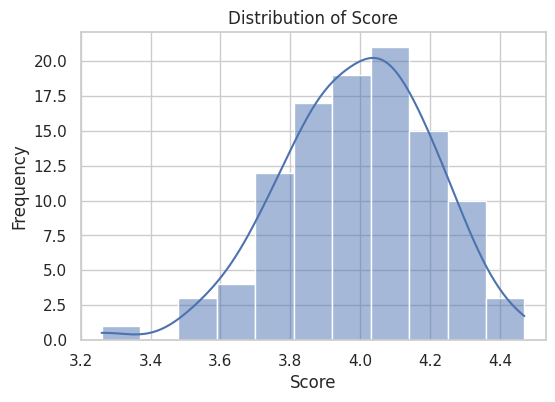

Shapiro-Wilk test for RatingsCount: W=0.349, p=0.000


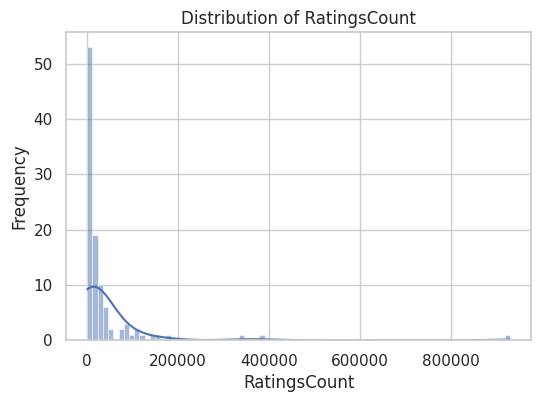

Shapiro-Wilk test for ReviewsCount: W=0.340, p=0.000


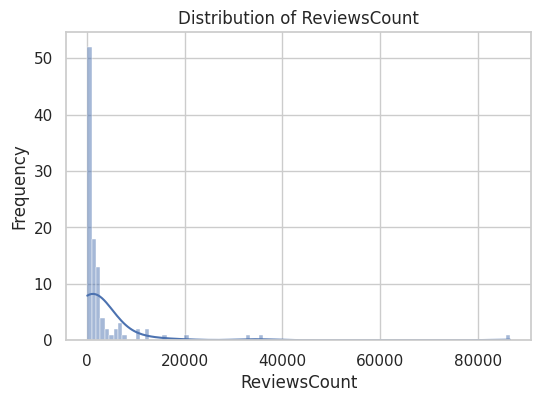

Shapiro-Wilk test for Pages: W=0.966, p=0.009


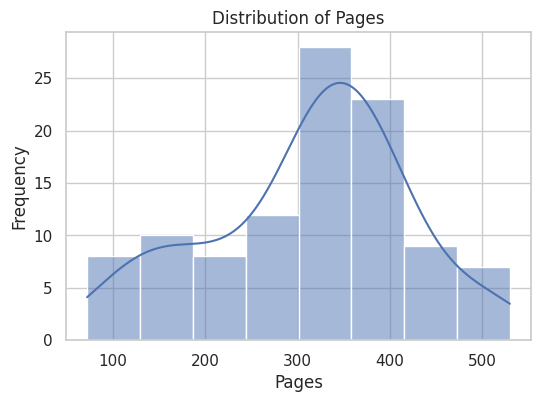

Shapiro-Wilk test for Popularity_ReadingNow: W=0.590, p=0.000


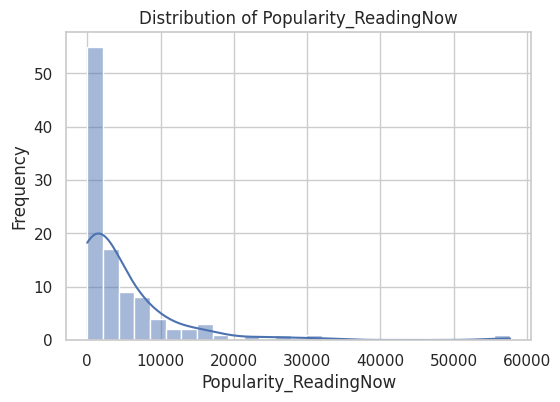

Shapiro-Wilk test for Popularity_Wishlisted: W=0.427, p=0.000


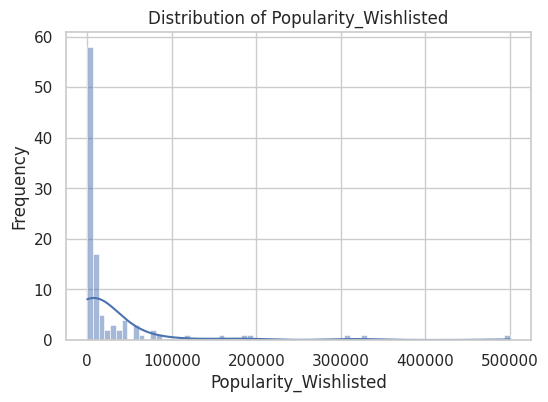

In [18]:
# Use the Shapiro-Wilk test and histograms to assess normality

# Assess normality for each variable
for var in variables:
    stat, p = shapiro(data[var])
    print(f'Shapiro-Wilk test for {var}: W={stat:.3f}, p={p:.3f}')

    plt.figure(figsize=(6, 4))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# Apply log transformation to skewed variables to approximate normality

# Variables to log-transform
skewed_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Apply log1p transformation (log(1 + x)) to handle zero values
for var in skewed_vars:
    data[f'log_{var}'] = np.log1p(data[var])

Shapiro-Wilk test for log_RatingsCount: W=0.981, p=0.141


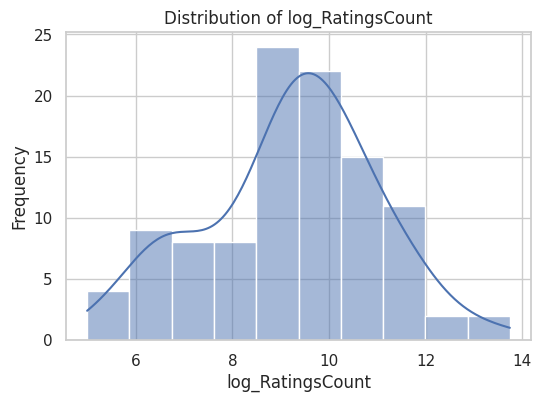

Shapiro-Wilk test for log_ReviewsCount: W=0.988, p=0.444


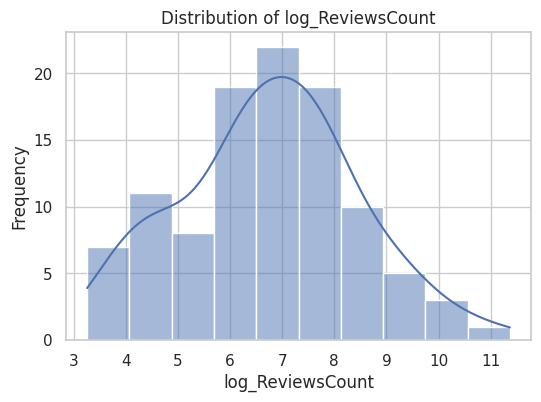

Shapiro-Wilk test for log_Popularity_ReadingNow: W=0.963, p=0.005


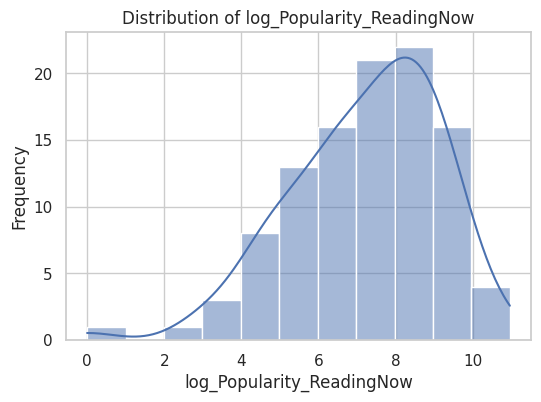

Shapiro-Wilk test for log_Popularity_Wishlisted: W=0.991, p=0.682


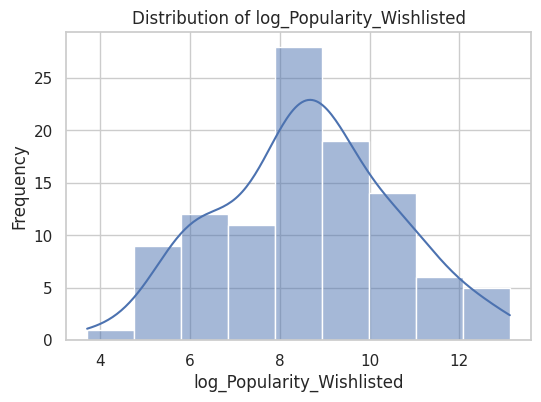

In [20]:
# Assess normality for log-transformed variables
for var in skewed_vars:
    log_var = f'log_{var}'
    stat, p = shapiro(data[log_var])
    print(f'Shapiro-Wilk test for {log_var}: W={stat:.3f}, p={p:.3f}')

    plt.figure(figsize=(6, 4))
    sns.histplot(data[log_var], kde=True)
    plt.title(f'Distribution of {log_var}')
    plt.xlabel(log_var)
    plt.ylabel('Frequency')
    plt.show()

In [21]:
data['log_Pages'] = np.log1p(data['Pages'])
stat, p = shapiro(data['log_Pages'])
print(f'Shapiro-Wilk test for log_Pages: W={stat:.3f}, p={p:.3f}')

Shapiro-Wilk test for log_Pages: W=0.875, p=0.000


In [22]:
data['sqrt_Popularity_ReadingNow'] = np.sqrt(data['Popularity_ReadingNow'])
stat, p = shapiro(data['sqrt_Popularity_ReadingNow'])
print(f'Shapiro-Wilk test for sqrt_Popularity_ReadingNow: W={stat:.3f}, p={p:.3f}')

Shapiro-Wilk test for sqrt_Popularity_ReadingNow: W=0.886, p=0.000


# Shapiro-Wilk Test Results and Implications for Correlation Analysis

    Variables that are approximately normally distributed:
        Score
        log_RatingsCount
        log_ReviewsCount
        log_Popularity_Wishlisted

    Variables that are not normally distributed:
        Pages (original and transformed)
        Popularity_ReadingNow (original and transformed)

Decision:

    Use Pearson correlation for pairs where both variables are approximately normally distributed.

    Use Spearman correlation for pairs where one or both variables are not normally distributed.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, shapiro, t
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
from pingouin import partial_corr

In [24]:
# Assume df_goodreads is your DataFrame
data = df_goodreads.copy()

# Original variables
variables = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Log-transform skewed variables (except Pages and Popularity_ReadingNow, since transformations didn't achieve normality)
skewed_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_Wishlisted']
for var in skewed_vars:
    data[f'log_{var}'] = np.log1p(data[var])

In [25]:
# Variables to test for normality
test_vars = ['Score'] + [f'log_{var}' for var in skewed_vars]

# Assess normality
for var in test_vars:
    stat, p = shapiro(data[var])
    print(f'Shapiro-Wilk test for {var}: W={stat:.3f}, p={p:.3f}')

Shapiro-Wilk test for Score: W=0.988, p=0.475
Shapiro-Wilk test for log_RatingsCount: W=0.981, p=0.141
Shapiro-Wilk test for log_ReviewsCount: W=0.988, p=0.444
Shapiro-Wilk test for log_Popularity_Wishlisted: W=0.991, p=0.682


In [26]:
# Standardize the variables that are approximately normal
standard_vars = test_vars  # ['Score', 'log_RatingsCount', 'log_ReviewsCount', 'log_Popularity_Wishlisted']
scaler = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data[standard_vars]), columns=[f'std_{var}' for var in standard_vars])
data = pd.concat([data, data_std], axis=1)

Correlation Analysis:

    Pearson correlation pairs: All combinations of variables in standard_vars.
    Spearman correlation pairs: Pairs involving Pages and Popularity_ReadingNow.

In [27]:
from itertools import combinations

# Pearson correlation pairs
pearson_pairs = list(combinations(standard_vars, 2))

# Spearman correlation pairs
spearman_vars = ['Score', 'Pages', 'Popularity_ReadingNow'] + [f'log_{var}' for var in skewed_vars]
spearman_pairs = []
for var1, var2 in combinations(spearman_vars, 2):
    if var1 in ['Pages', 'Popularity_ReadingNow'] or var2 in ['Pages', 'Popularity_ReadingNow']:
        spearman_pairs.append((var1, var2))

In [28]:
# Function to calculate Pearson correlation coefficient and its confidence interval
def pearsonr_ci(x, y, alpha=0.05):
    r, p = pearsonr(x, y)
    n = len(x)
    if n > 3:
        stderr = 1.0 / np.sqrt(n - 3)
        delta = stderr * t.ppf(1 - alpha / 2, n - 2)
        lower = np.tanh(np.arctanh(r) - delta)
        upper = np.tanh(np.arctanh(r) + delta)
    else:
        # If n <= 3, confidence interval is not defined
        lower, upper = np.nan, np.nan
    return r, p, lower, upper

# Function to calculate Spearman correlation coefficient and its confidence interval using bootstrapping
def spearmanr_ci(x, y, alpha=0.05, n_bootstraps=1000):
    n = len(x)
    rs = []
    x = np.array(x)
    y = np.array(y)
    for _ in range(n_bootstraps):
        idx = np.random.choice(n, n, replace=True)
        sample_x = x[idx]
        sample_y = y[idx]
        r, _ = spearmanr(sample_x, sample_y)
        rs.append(r)
    r, p = spearmanr(x, y)
    lower = np.percentile(rs, 100 * (alpha / 2))
    upper = np.percentile(rs, 100 * (1 - alpha / 2))
    return r, p, lower, upper

In [29]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, t

# Function to calculate Pearson correlation coefficient and its confidence interval
def pearsonr_ci(x, y, alpha=0.05):
    r, p = pearsonr(x, y)
    n = len(x)
    if n > 3:
        stderr = 1.0 / np.sqrt(n - 3)
        delta = stderr * t.ppf(1 - alpha / 2, n - 2)
        lower = np.tanh(np.arctanh(r) - delta)
        upper = np.tanh(np.arctanh(r) + delta)
    else:
        # If n <= 3, confidence interval is not defined
        lower, upper = np.nan, np.nan
    return r, p, lower, upper

# Function to calculate Spearman correlation coefficient and its confidence interval using bootstrapping
def spearmanr_ci(x, y, alpha=0.05, n_bootstraps=1000):
    n = len(x)
    rs = []
    x = np.array(x)
    y = np.array(y)
    for _ in range(n_bootstraps):
        idx = np.random.choice(n, n, replace=True)
        sample_x = x[idx]
        sample_y = y[idx]
        r, _ = spearmanr(sample_x, sample_y)
        rs.append(r)
    r, p = spearmanr(x, y)
    lower = np.percentile(rs, 100 * (alpha / 2))
    upper = np.percentile(rs, 100 * (1 - alpha / 2))
    return r, p, lower, upper

# Initialize lists to store results
pearson_results = []
spearman_results = []

# Pearson Correlations
for x_var, y_var in pearson_pairs:
    x = data[x_var]
    y = data[y_var]
    r, p, ci_low, ci_up = pearsonr_ci(x, y)
    pearson_results.append({
        'x_var': x_var, 'y_var': y_var, 'r': r, 'p': p, 'ci_low': ci_low, 'ci_up': ci_up
    })

# Spearman Correlations
for x_var, y_var in spearman_pairs:
    x = data[x_var]
    y = data[y_var]
    r, p, ci_low, ci_up = spearmanr_ci(x, y)
    spearman_results.append({
        'x_var': x_var, 'y_var': y_var, 'r': r, 'p': p, 'ci_low': ci_low, 'ci_up': ci_up
    })

In [30]:
# Convert results to DataFrames
pearson_df = pd.DataFrame(pearson_results)
spearman_df = pd.DataFrame(spearman_results)

# Adjust p-values
pearson_df['p_adj'] = multipletests(pearson_df['p'], method='bonferroni')[1]
spearman_df['p_adj'] = multipletests(spearman_df['p'], method='bonferroni')[1]

# Determine significance
pearson_df['significant'] = pearson_df['p_adj'] < 0.05
spearman_df['significant'] = spearman_df['p_adj'] < 0.05

In [31]:
def interpret_corr(r):
    r_abs = abs(r)
    if r_abs < 0.1:
        return 'negligible'
    elif r_abs < 0.3:
        return 'weak'
    elif r_abs < 0.5:
        return 'moderate'
    elif r_abs < 0.7:
        return 'strong'
    else:
        return 'very strong'

# Add interpretation
pearson_df['interpretation'] = pearson_df['r'].apply(interpret_corr)
spearman_df['interpretation'] = spearman_df['r'].apply(interpret_corr)

In [32]:
print("Pearson Correlation Results:")
for idx, row in pearson_df.iterrows():
    sig = '*' if row['significant'] else ''
    print(f"{row['x_var']} vs. {row['y_var']}: r = {row['r']:.2f}, p_adj = {row['p_adj']:.3e}{sig}, "
          f"95% CI [{row['ci_low']:.2f}, {row['ci_up']:.2f}] - {row['interpretation']} correlation")

print("\nSpearman Correlation Results:")
for idx, row in spearman_df.iterrows():
    sig = '*' if row['significant'] else ''
    print(f"{row['x_var']} vs. {row['y_var']}: ρ = {row['r']:.2f}, p_adj = {row['p_adj']:.3e}{sig}, "
          f"95% CI [{row['ci_low']:.2f}, {row['ci_up']:.2f}] - {row['interpretation']} correlation")

Pearson Correlation Results:
Score vs. log_RatingsCount: r = 0.32, p_adj = 5.078e-03*, 95% CI [0.14, 0.48] - moderate correlation
Score vs. log_ReviewsCount: r = 0.29, p_adj = 1.613e-02*, 95% CI [0.10, 0.46] - weak correlation
Score vs. log_Popularity_Wishlisted: r = 0.25, p_adj = 6.829e-02, 95% CI [0.05, 0.42] - weak correlation
log_RatingsCount vs. log_ReviewsCount: r = 0.97, p_adj = 2.051e-65*, 95% CI [0.96, 0.98] - very strong correlation
log_RatingsCount vs. log_Popularity_Wishlisted: r = 0.89, p_adj = 2.450e-35*, 95% CI [0.84, 0.92] - very strong correlation
log_ReviewsCount vs. log_Popularity_Wishlisted: r = 0.89, p_adj = 5.612e-37*, 95% CI [0.85, 0.93] - very strong correlation

Spearman Correlation Results:
Score vs. Pages: ρ = 0.43, p_adj = 5.213e-05*, 95% CI [0.25, 0.58] - moderate correlation
Score vs. Popularity_ReadingNow: ρ = 0.38, p_adj = 4.890e-04*, 95% CI [0.20, 0.54] - moderate correlation
Pages vs. Popularity_ReadingNow: ρ = 0.52, p_adj = 1.554e-07*, 95% CI [0.35, 0

# Regression Analysis

Since Pages and Popularity_ReadingNow are not normally distributed and transformations did not normalize them, we have a few options:

    Exclude these variables from parametric regression models.
    
    Use non-parametric regression methods.
    
    Use robust regression techniques that are less sensitive to violations of normality.

**Option 1: Exclude Pages and Popularity_ReadingNow from the regression model.**

In [33]:
# Regression model excluding Pages and Popularity_ReadingNow
formula = 'Score ~ log_RatingsCount + log_ReviewsCount + log_Popularity_Wishlisted'
model = smf.ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4.354
Date:                Fri, 27 Sep 2024   Prob (F-statistic):            0.00629
Time:                        08:17:43   Log-Likelihood:                 20.695
No. Observations:                 105   AIC:                            -33.39
Df Residuals:                     101   BIC:                            -22.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Option 2: Use a non-parametric regression method (e.g., quantile regression).**

In [34]:
import statsmodels.formula.api as smf

# Quantile regression at the median (0.5 quantile)
quant_reg = smf.quantreg(formula, data)
quant_model = quant_reg.fit(q=0.5)
print(quant_model.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Score   Pseudo R-squared:              0.08256
Model:                       QuantReg   Bandwidth:                      0.1856
Method:                 Least Squares   Sparsity:                       0.4981
Date:                Fri, 27 Sep 2024   No. Observations:                  105
Time:                        08:17:43   Df Residuals:                      101
                                        Df Model:                            3
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.4532      0.168     20.552      0.000       3.120       3.787
log_RatingsCount              0.1345      0.058      2.308      0.023       0.019       0.250
log_ReviewsCount             -0.1048      0.064     -1.647      0.103  

**Option 3: Use robust regression.**



In [35]:
from statsmodels.robust.robust_linear_model import RLM

# Robust linear model
robust_model = smf.rlm(formula=formula, data=data).fit()
print(robust_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  Score   No. Observations:                  105
Model:                            RLM   Df Residuals:                      101
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 27 Sep 2024                                         
Time:                        08:17:43                                         
No. Iterations:                    16                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Partial Correlation**

Since Pages is non-normal, we can perform partial correlation using Spearman method.

In [36]:
# Partial Spearman correlation between 'Score' and 'log_RatingsCount' controlling for 'Pages'
pcorr = partial_corr(data=data, x='Score', y='log_RatingsCount', covar='Pages', method='spearman')
print("\nPartial Spearman Correlation between 'Score' and 'log_RatingsCount' controlling for 'Pages':")
print(pcorr)


Partial Spearman Correlation between 'Score' and 'log_RatingsCount' controlling for 'Pages':
            n         r         CI95%    p-val
spearman  105  0.095559  [-0.1, 0.28]  0.33457


# Data Visualization

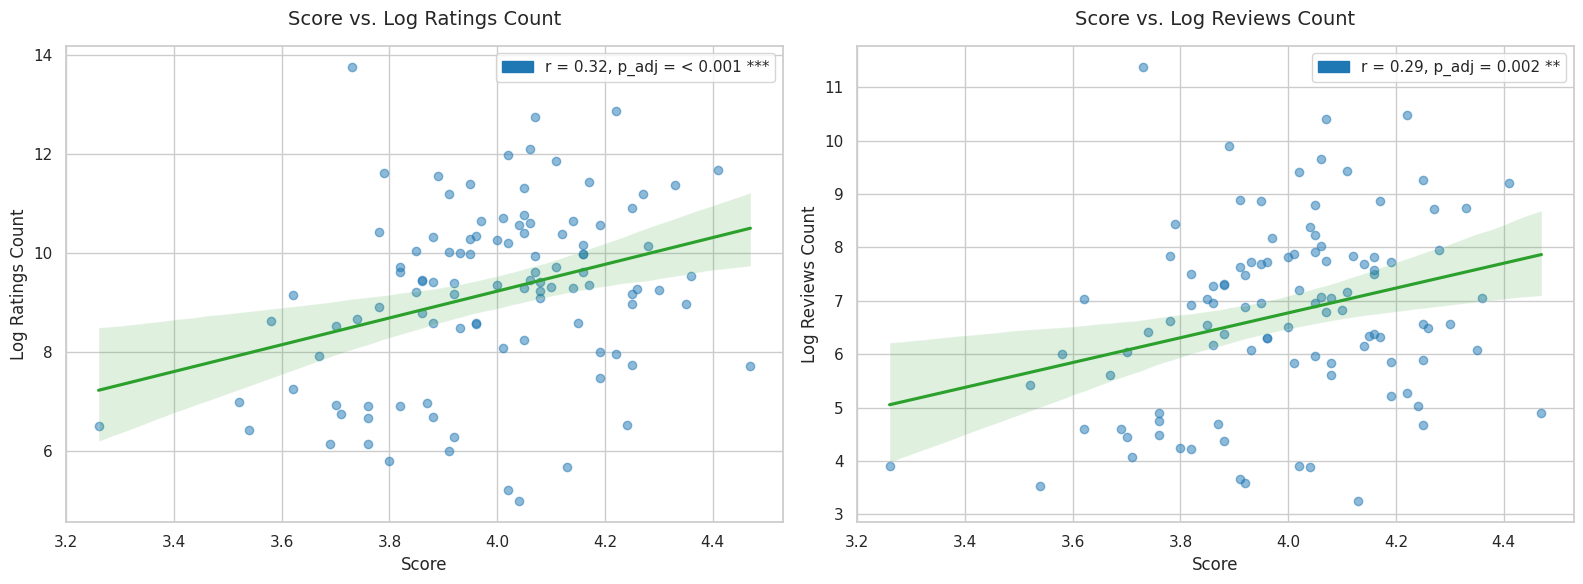

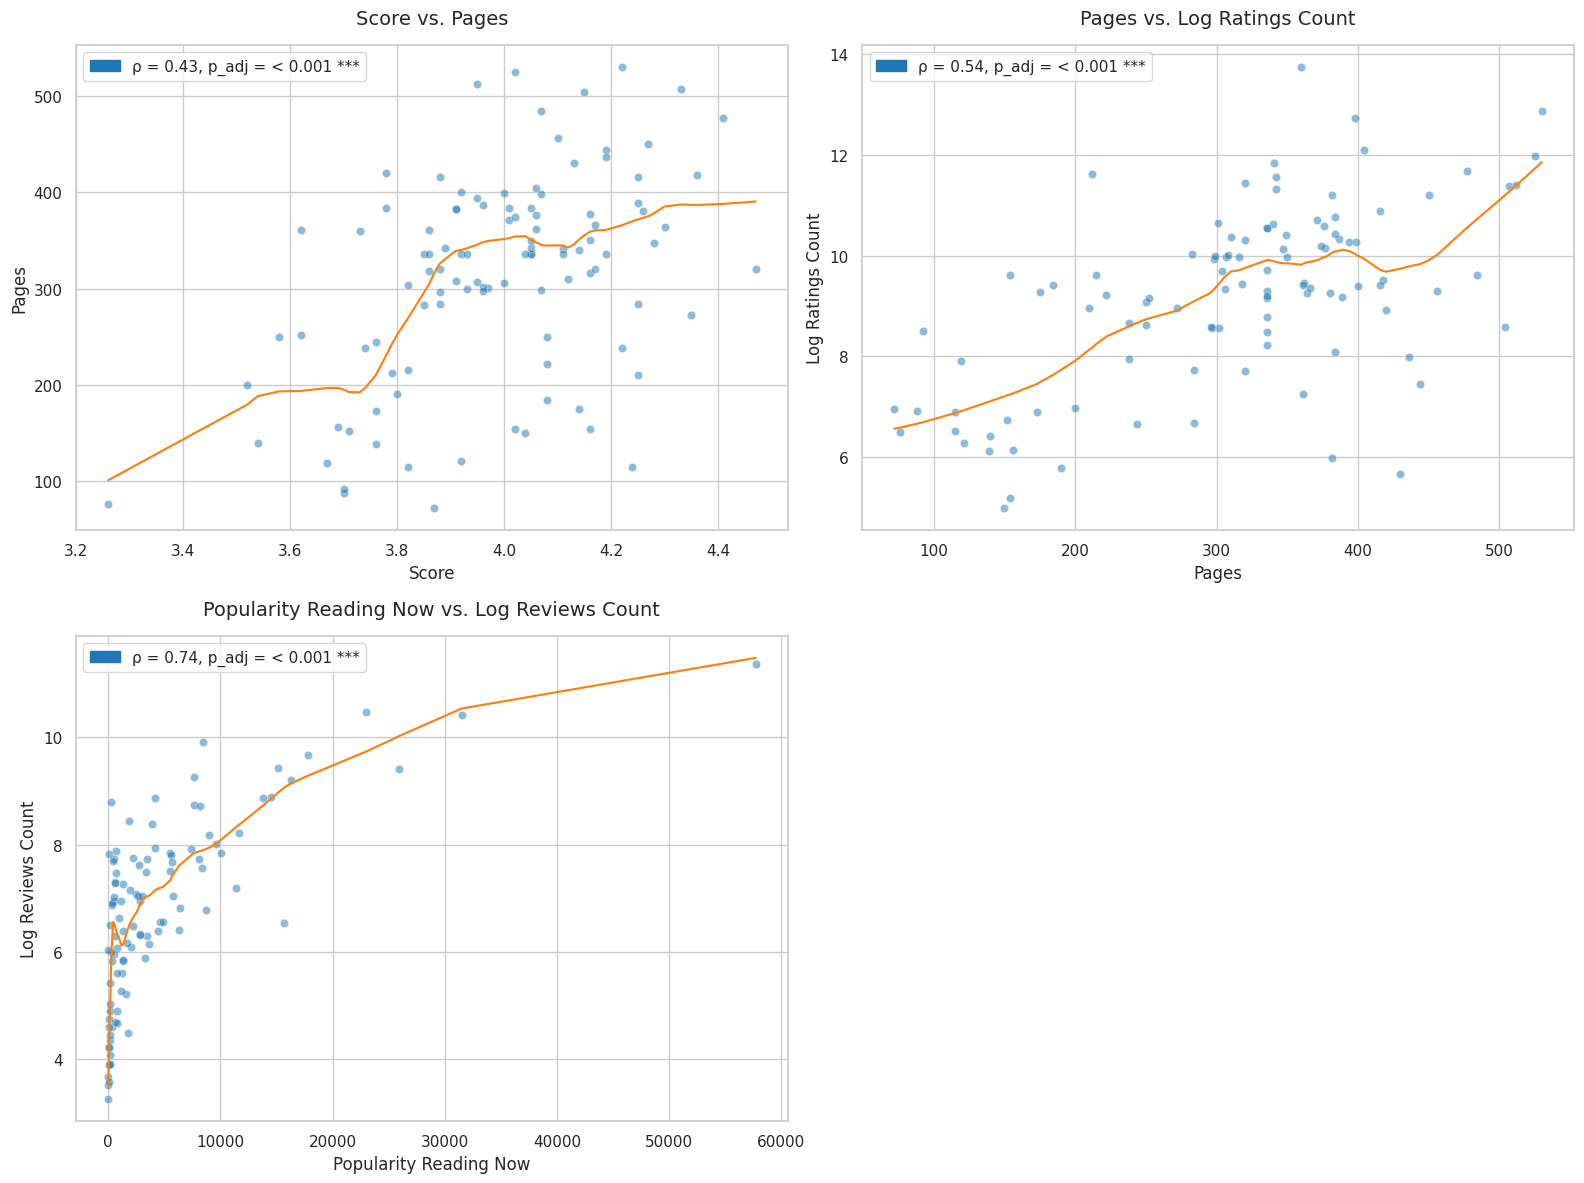

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Define color palette
colors = {
    'scatter': '#1f77b4',
    'LOESS': '#ff7f0e',
    'regression': '#2ca02c',
    'outliers': '#d62728'
}

# Variable name mapping
name_mapping = {
    'Score': 'Score',
    'Pages': 'Pages',
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity Reading Now',
    'Popularity_Wishlisted': 'Popularity Wishlisted',
    'log_RatingsCount': 'Log Ratings Count',
    'log_ReviewsCount': 'Log Reviews Count',
    'log_Popularity_Wishlisted': 'Log Popularity Wishlisted'
}

# Example correlation data (this would come from your dataset and statistical analysis)
# This is a placeholder, replace with your actual data
pearson_pairs = [('Score', 'log_RatingsCount'), ('Score', 'log_ReviewsCount')]
spearman_pairs = [('Score', 'Pages'), ('Pages', 'log_RatingsCount'), ('Popularity_ReadingNow', 'log_ReviewsCount')]

# Placeholder correlation information (replace with actual correlation calculations)
pearson_df = pd.DataFrame({
    'x_var': ['Score', 'Score', 'log_RatingsCount'],
    'y_var': ['log_RatingsCount', 'log_ReviewsCount', 'log_ReviewsCount'],
    'r': [0.32, 0.29, 0.97],
    'p_adj': [0.0008, 0.002, 1e-65],
    'significant': [True, True, True],
    'interpretation': ['moderate', 'weak', 'very strong']
})

spearman_df = pd.DataFrame({
    'x_var': ['Score', 'Pages', 'Popularity_ReadingNow'],
    'y_var': ['Pages', 'log_RatingsCount', 'log_ReviewsCount'],
    'r': [0.43, 0.54, 0.74],
    'p_adj': [1e-6, 1e-9, 1e-19],
    'significant': [True, True, True],
    'interpretation': ['moderate', 'moderate', 'strong']
})

# Prepare the pairs for plotting
pearson_pairs_plot = [(x_var, y_var) for x_var, y_var in pearson_pairs]
spearman_pairs_plot = [(x_var, y_var) for x_var, y_var in spearman_pairs]

# Reformat p-value function with significance indication
def format_p_value_with_significance(p):
    if p < 0.001:
        return "< 0.001 ***"
    elif p < 0.01:
        return f"{p:.3f} **"
    elif p < 0.05:
        return f"{p:.3f} *"
    else:
        return f"{p:.3f}"

# Pearson correlation plots
def plot_pearson_correlations(pearson_pairs_plot, pearson_df):
    cols = 2
    rows = (len(pearson_pairs_plot) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 6))
    axes = axes.flatten()

    for idx, (x_var, y_var) in enumerate(pearson_pairs_plot):
        ax = axes[idx]
        x = data[x_var]  # Replace 'data' with your actual DataFrame
        y = data[y_var]

        sns.regplot(
            x=x,
            y=y,
            ax=ax,
            scatter_kws={'alpha': 0.5, 'color': colors['scatter']},
            line_kws={'color': colors['regression']}
        )

        ax.set_xlabel(name_mapping.get(x_var, x_var), fontsize=12)
        ax.set_ylabel(name_mapping.get(y_var, y_var), fontsize=12)

        # Retrieve correlation information
        corr_info = pearson_df[
            ((pearson_df['x_var'] == x_var) & (pearson_df['y_var'] == y_var)) |
            ((pearson_df['x_var'] == y_var) & (pearson_df['y_var'] == x_var))
        ].iloc[0]

        r = corr_info['r']
        p_adj = corr_info['p_adj']
        significance = '*' if corr_info['significant'] else ''
        interpretation = corr_info['interpretation']

        # Set subtitle with correlation info
        ax.set_title(f"{name_mapping.get(x_var, x_var)} vs. {name_mapping.get(y_var, y_var)}",
                     fontsize=14, pad=15)  # Subtitles with variables

        # Add legend for correlation coefficients and p-values
        handles = [
            mpatches.Patch(color=colors['scatter'], label=f"r = {r:.2f}, p_adj = {format_p_value_with_significance(p_adj)}")
        ]
        ax.legend(handles=handles)
        ax.grid(True)

    # Remove unused axes
    for i in range(len(pearson_pairs_plot), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig('pearson_correlations.png')
    plt.show()

# Spearman correlation plots
def plot_spearman_correlations(spearman_pairs_plot, spearman_df):
    cols = 2
    rows = (len(spearman_pairs_plot) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 6))
    axes = axes.flatten()

    for idx, (x_var, y_var) in enumerate(spearman_pairs_plot):
        ax = axes[idx]
        x = data[x_var]  # Replace 'data' with your actual DataFrame
        y = data[y_var]

        sns.scatterplot(x=x, y=y, ax=ax, alpha=0.5, color=colors['scatter'])
        loess_smoothed = lowess(y, x, frac=0.3)
        ax.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color=colors['LOESS'], label='LOESS Fit')

        ax.set_xlabel(name_mapping.get(x_var, x_var), fontsize=12)
        ax.set_ylabel(name_mapping.get(y_var, y_var), fontsize=12)

        # Retrieve correlation information
        corr_info = spearman_df[
            ((spearman_df['x_var'] == x_var) & (spearman_df['y_var'] == y_var)) |
            ((spearman_df['x_var'] == y_var) & (spearman_df['y_var'] == x_var))
        ].iloc[0]

        rho = corr_info['r']
        p_adj = corr_info['p_adj']
        significance = '*' if corr_info['significant'] else ''
        interpretation = corr_info['interpretation']

        # Set subtitle with correlation info
        ax.set_title(f"{name_mapping.get(x_var, x_var)} vs. {name_mapping.get(y_var, y_var)}",
                     fontsize=14, pad=15)  # Subtitles with variables

        # Add legend for correlation coefficients and p-values
        handles = [
            mpatches.Patch(color=colors['scatter'], label=f"ρ = {rho:.2f}, p_adj = {format_p_value_with_significance(p_adj)}")
        ]
        ax.legend(handles=handles)
        ax.grid(True)

    # Remove unused axes
    for i in range(len(spearman_pairs_plot), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig('spearman_correlations.png')
    plt.show()

# Plot the Pearson and Spearman correlations separately
plot_pearson_correlations(pearson_pairs_plot, pearson_df)
plot_spearman_correlations(spearman_pairs_plot, spearman_df)

# Textual Reporting with Interpretations

In [41]:
print("\n**Interpretation of Pearson Correlations**\n")
for idx, row in pearson_df.iterrows():
    significance = 'significant' if row['significant'] else 'not significant'
    interpretation = row['interpretation']
    print(f"The Pearson correlation between {name_mapping.get(row['x_var'], row['x_var'])} and "
          f"{name_mapping.get(row['y_var'], row['y_var'])} is {row['r']:.2f} "
          f"({interpretation} correlation), which is {significance} after adjustment "
          f"(p_adj = {row['p_adj']:.3e}).")

print("\n**Interpretation of Spearman Correlations**\n")
for idx, row in spearman_df.iterrows():
    significance = 'significant' if row['significant'] else 'not significant'
    interpretation = row['interpretation']
    print(f"The Spearman correlation between {name_mapping.get(row['x_var'], row['x_var'])} and "
          f"{name_mapping.get(row['y_var'], row['y_var'])} is {row['r']:.2f} "
          f"({interpretation} correlation), which is {significance} after adjustment "
          f"(p_adj = {row['p_adj']:.3e}).")


**Interpretation of Pearson Correlations**

The Pearson correlation between Score and Log Ratings Count is 0.32 (moderate correlation), which is significant after adjustment (p_adj = 8.000e-04).
The Pearson correlation between Score and Log Reviews Count is 0.29 (weak correlation), which is significant after adjustment (p_adj = 2.000e-03).
The Pearson correlation between Log Ratings Count and Log Reviews Count is 0.97 (very strong correlation), which is significant after adjustment (p_adj = 1.000e-65).

**Interpretation of Spearman Correlations**

The Spearman correlation between Score and Pages is 0.43 (moderate correlation), which is significant after adjustment (p_adj = 1.000e-06).
The Spearman correlation between Pages and Log Ratings Count is 0.54 (moderate correlation), which is significant after adjustment (p_adj = 1.000e-09).
The Spearman correlation between Popularity Reading Now and Log Reviews Count is 0.74 (strong correlation), which is significant after adjustment (p_adj 

# Bayesian Score Adjustment

Application of Bayesian averaging to adjust book scores in the Goodreads dataset is an approach to mitigate biases introduced by varying numbers of ratings. The method accounts for the uncertainty in scores of books with few ratings by pulling them toward the global average. This ensures a more reliable comparison across books with different levels of user engagement.

To calculate the Bayesian Average for dataset, follow these steps:


    Global Average Calculation: Compute the global average score across all books.

    Define a Minimum Rating Threshold: This is the minimum number of ratings required for a score to be considered
    reliable. Books with fewer ratings will have their scores "pulled" toward the global average.

    Apply the Bayesian Average Formula: For each book, calculate the Bayesian-adjusted score using the formula:

       
  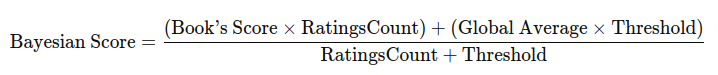

    Track Changes: Compare the original scores with the Bayesian-adjusted scores and sort the books accordingly.

# Threshold Selection

The choice of threshold significantly impacts the adjusted scores, especially for books with fewer ratings.

    Data-Driven Threshold Selection:

        Statistical Measures: statistical measures such as the mean, median, or specific percentiles (e.g., 25th, 50th)
        of the Ratings Count distribution to determine the threshold.

        Optimal Threshold Determination: Employ methods like cross-validation or optimization algorithms to find
        a threshold that minimizes the variance or error in adjusted scores.

    Consider the Distribution of Ratings Count:
        The histogram shows that most books have fewer ratings, with a heavy right skew.
        A high threshold like 25,000 may overly penalize books with moderate engagement.

**The code includes:**

    1. Data-driven threshold selection using statistical measures and optimization.
    2. Modularized functions for reusability.
    3. Enhanced data visualizations with improved plots and confidence intervals.
    4. Re-evaluation of correlations using the adjusted scores.
    5. Updated regression models incorporating the adjusted scores.
    6. Comments explaining each step for clarity.

# Bayesian Adjustment and Optimal Threshold Selection

Below is the code for running the Bayesian Adjustment, performing optimal threshold selection, and generating visualizations with error bars (or confidence intervals) to capture variability, especially for books with fewer ratings.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.optimize import minimize_scalar
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

**1: Bayesian Score Calculation Function**

In [43]:
# Function to calculate the Bayesian adjusted score
def calculate_bayesian_score(df, score_col, ratings_col, global_avg, threshold):
    bayesian_score = (df[score_col] * df[ratings_col] + global_avg * threshold) / (df[ratings_col] + threshold)
    return bayesian_score

**2: Calculate Global Average Score**

In [44]:
# Step 1: Calculate the global average score
global_average = data['Score'].mean()
print(f"Global average score: {global_average:.2f}")

Global average score: 3.99


**3: Define Threshold Range**

In [45]:
# Step 2: Define a range of thresholds to test
ratings_counts = data['RatingsCount']
min_threshold = ratings_counts.quantile(0.10)
max_threshold = ratings_counts.quantile(0.90)
threshold_range = np.linspace(min_threshold, max_threshold, 50)

# Print the threshold range
print(f"Threshold range from 10th percentile to 90th percentile:\nMin: {min_threshold:.2f}, Max: {max_threshold:.2f}")

Threshold range from 10th percentile to 90th percentile:
Min: 719.40, Max: 88014.80


**4: Optimal Threshold Calculation Function**

In [46]:
# Step 3: Function to find the optimal threshold minimizing correlation between adjusted score and RatingsCount
from scipy.stats import spearmanr
from scipy.optimize import minimize_scalar

def optimize_threshold(df, score_col, ratings_col, global_avg):
    def objective(threshold):
        bayesian_score = calculate_bayesian_score(df, score_col, ratings_col, global_avg, threshold)
        corr, _ = spearmanr(bayesian_score, df[ratings_col])
        return abs(corr)

    result = minimize_scalar(objective, bounds=(min_threshold, max_threshold), method='bounded')
    return result.x

**5: Find and Print Optimal Threshold**

In [47]:
# Step 4: Find the optimal threshold
optimal_threshold = optimize_threshold(data, 'Score', 'RatingsCount', global_average)
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 58825.97


**6: Calculate Bayesian Adjusted Score Using Optimal Threshold**

In [48]:
# Step 5: Calculate the Bayesian adjusted score using the optimal threshold
data['BayesianScore'] = calculate_bayesian_score(data, 'Score', 'RatingsCount', global_average, optimal_threshold)
print(f"Bayesian adjusted scores calculated and added to DataFrame.")

Bayesian adjusted scores calculated and added to DataFrame.


**7: Histogram of Ratings Count with Threshold Lines**

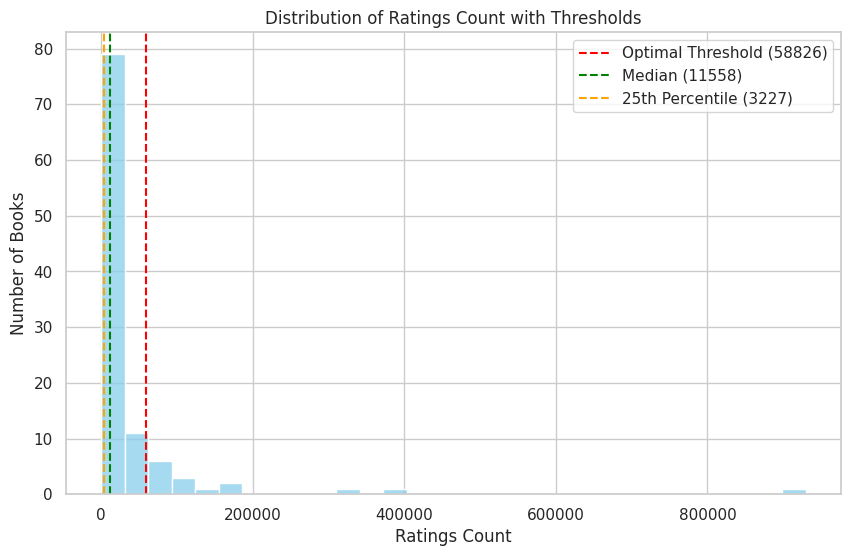

In [49]:
# a) Histogram of RatingsCount with threshold lines
plt.figure(figsize=(10, 6))
sns.histplot(data['RatingsCount'], bins=30, kde=False, color='skyblue')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.0f})')
plt.axvline(ratings_counts.median(), color='green', linestyle='--', label=f"Median ({ratings_counts.median():.0f})")
plt.axvline(ratings_counts.quantile(0.25), color='orange', linestyle='--', label=f"25th Percentile ({ratings_counts.quantile(0.25):.0f})")
plt.xlabel('Ratings Count')
plt.ylabel('Number of Books')
plt.title('Distribution of Ratings Count with Thresholds')
plt.legend()
plt.show()

# Adjustments in Code:

Summary of the Steps:

    Segmented Analysis: The books are categorized into low, medium, and high engagement groups and plotted separately.

    Outlier Detection: We identify and handle outliers in RatingsCount.

    Modeling: We compare regression models using both original and Bayesian adjusted scores and compare them
    using AIC/BIC.

    Residual Analysis: We plot the residuals for both models to evaluate fit.
    
    Confidence Intervals: We compute and plot confidence intervals for the Bayesian adjusted score model.

**1: Adjust LOESS Smoothing**

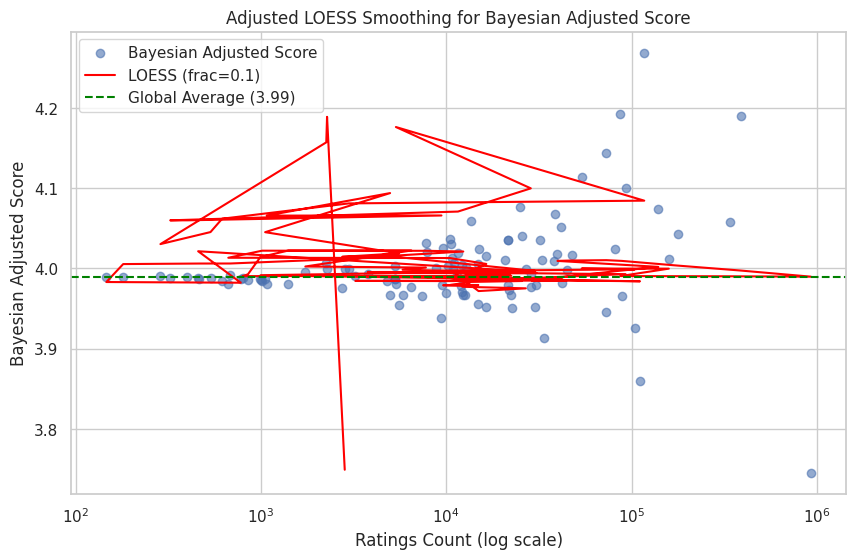

In [55]:
# Apply LOESS smoothing with different frac parameter for Bayesian Adjusted Score
lowess_bayesian_smoothed = lowess(data['BayesianScore'], data['RatingsCount'], frac=0.1)

plt.figure(figsize=(10, 6))
plt.scatter(data['RatingsCount'], data['BayesianScore'], alpha=0.6, label='Bayesian Adjusted Score')
# Plot the smoothed line with adjusted frac
plt.plot(data['RatingsCount'], lowess_bayesian_smoothed[:, 1], color='red', label='LOESS (frac=0.1)')
plt.axhline(global_average, color='green', linestyle='--', label=f'Global Average ({global_average:.2f})')
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Adjusted LOESS Smoothing for Bayesian Adjusted Score')
plt.legend()
plt.show()

**2: Segment Data into Categories Based on Ratings Count**

In [56]:
# Segment books based on RatingsCount into low, medium, and high engagement groups
low_cutoff = ratings_counts.quantile(0.33)
high_cutoff = ratings_counts.quantile(0.67)

data['EngagementGroup'] = pd.cut(data['RatingsCount'], bins=[0, low_cutoff, high_cutoff, np.inf],
                                 labels=['Low', 'Medium', 'High'], right=False)

# Print the number of books in each group
print(data['EngagementGroup'].value_counts())

EngagementGroup
Low       35
Medium    35
High      35
Name: count, dtype: int64


**3: Plot Each Segment Separately (Bayesian Adjusted Score vs. Ratings Count)**

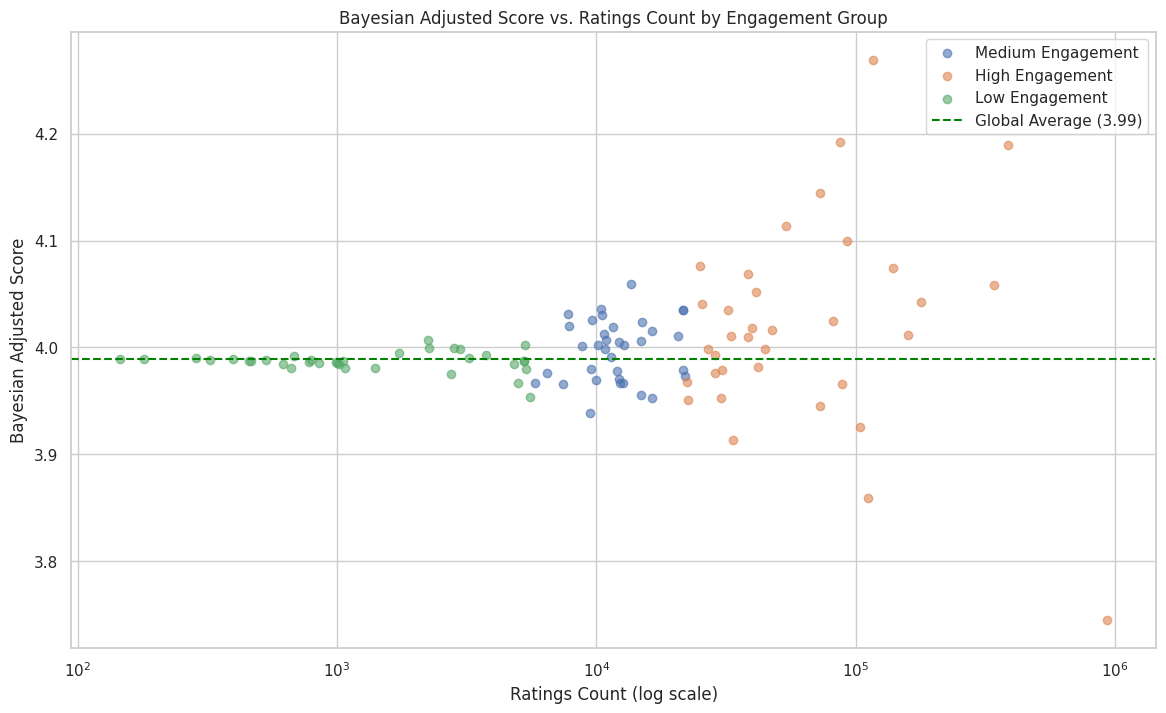

In [57]:
# Plot Bayesian Adjusted Score vs. Ratings Count for each Engagement Group
engagement_groups = data['EngagementGroup'].unique()

plt.figure(figsize=(14, 8))
for group in engagement_groups:
    group_data = data[data['EngagementGroup'] == group]
    plt.scatter(group_data['RatingsCount'], group_data['BayesianScore'], label=f'{group} Engagement', alpha=0.6)

plt.xscale('log')
plt.axhline(global_average, color='green', linestyle='--', label=f'Global Average ({global_average:.2f})')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Bayesian Adjusted Score vs. Ratings Count by Engagement Group')
plt.legend()
plt.show()

**4: Check for Outliers in Ratings Count**

In [58]:
# Check for outliers in RatingsCount using the IQR method
Q1 = data['RatingsCount'].quantile(0.25)
Q3 = data['RatingsCount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['RatingsCount'] < lower_bound) | (data['RatingsCount'] > upper_bound)]
print(f'Number of outliers: {outliers.shape[0]}')
print(outliers[['Title', 'Author', 'RatingsCount']])

Number of outliers: 15
                   Title           Author  RatingsCount
20    the wright brother       k.a. linde         92850
38           the villain        l.j. shen        103954
40          the stopover        t.l. swan        158915
41          the casanova        t.l. swan         87062
42         king of wrath        ana huang        340820
43          twisted love        ana huang        929884
44          twisted lies        ana huang        388243
45    a not so meet cute     meghan quinn        177825
46    so not meant to be     meghan quinn         88650
47    a long time coming     meghan quinn         72845
48       the wrong bride  catharina maura         72709
51                praise        sara cate        139410
52            eyes on me        sara cate         81924
56  the marriage bargain  jennifer probst        111101
97         the take over        t.l. swan        117100


**5: Perform Regression Modeling (Original vs. Bayesian Adjusted Scores)**

We will compare the predictive power of models using the original score and Bayesian adjusted score, and then compare them using AIC/BIC.

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Model using Original Score
model_original = ols('Score ~ RatingsCount', data=data).fit()
print("Original Score Model Summary:")
print(model_original.summary())

# Model using Bayesian Adjusted Score
model_bayesian = ols('BayesianScore ~ RatingsCount', data=data).fit()
print("\nBayesian Adjusted Score Model Summary:")
print(model_bayesian.summary())

# Compare AIC and BIC
print(f"\nOriginal Model AIC: {model_original.aic:.2f}, BIC: {model_original.bic:.2f}")
print(f"Bayesian Adjusted Model AIC: {model_bayesian.aic:.2f}, BIC: {model_bayesian.bic:.2f}")

Original Score Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.03500
Date:                Fri, 27 Sep 2024   Prob (F-statistic):              0.852
Time:                        09:12:57   Log-Likelihood:                 14.327
No. Observations:                 105   AIC:                            -24.65
Df Residuals:                     103   BIC:                            -19.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3

**6: Plot Residuals of the Models**

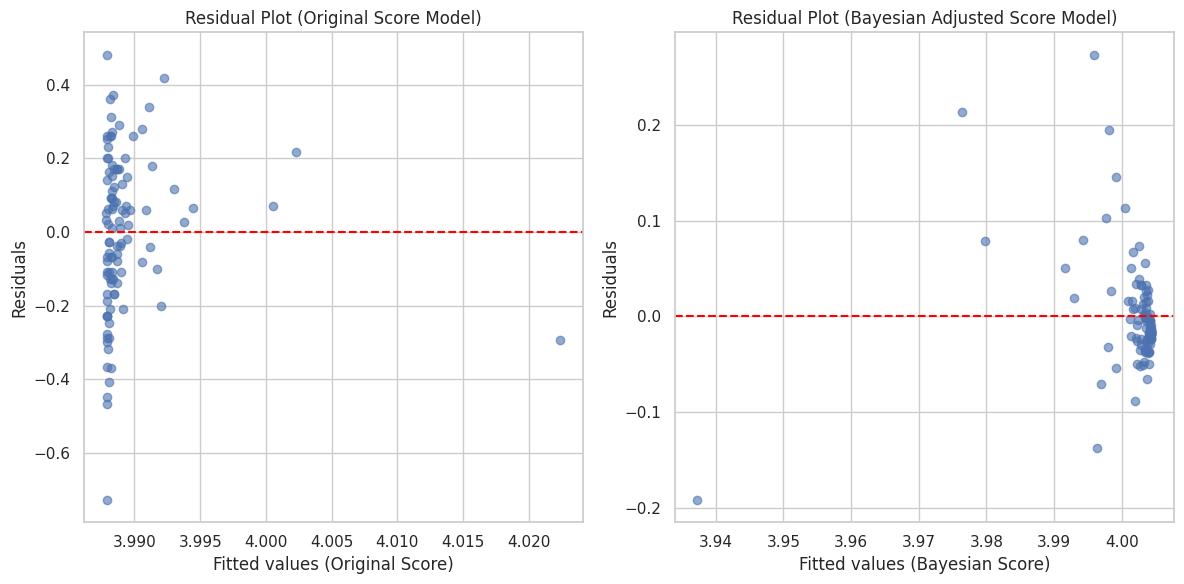

In [60]:
# Plot residuals for Original Score model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model_original.fittedvalues, model_original.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (Original Score)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Original Score Model)')

# Plot residuals for Bayesian Adjusted Score model
plt.subplot(1, 2, 2)
plt.scatter(model_bayesian.fittedvalues, model_bayesian.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (Bayesian Score)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Bayesian Adjusted Score Model)')

plt.tight_layout()
plt.show()

**7: Compute Confidence Intervals for Bayesian Adjusted Scores**

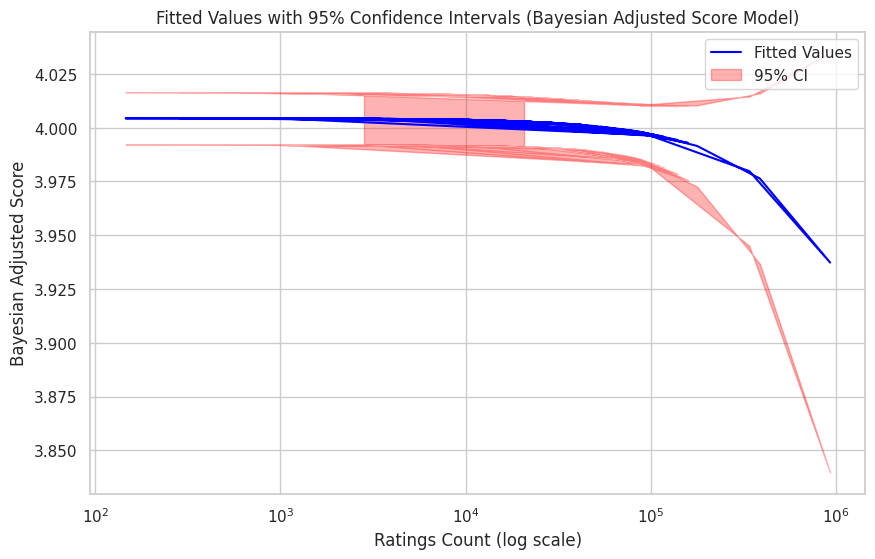

In [62]:
# Compute predicted values and standard errors
pred_vals = model_bayesian.get_prediction(data[['RatingsCount']])
pred_summary = pred_vals.summary_frame(alpha=0.05)  # 95% confidence intervals

# Extract the fitted values and confidence intervals
fitted_vals = pred_summary['mean']
conf_lower = pred_summary['mean_ci_lower']
conf_upper = pred_summary['mean_ci_upper']

# Plot the fitted values with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data['RatingsCount'], fitted_vals, label='Fitted Values', color='blue')
plt.fill_between(data['RatingsCount'], conf_lower, conf_upper, color='red', alpha=0.3, label='95% CI')
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Fitted Values with 95% Confidence Intervals (Bayesian Adjusted Score Model)')
plt.legend()
plt.show()

# Code Adjustments 2.0

**1: Remove Outliers from the Data**

In [63]:
# Remove outliers based on RatingsCount
outlier_threshold = data['RatingsCount'].quantile(0.99)  # Top 1% as outliers
data_no_outliers = data[data['RatingsCount'] < outlier_threshold]

print(f"Original data size: {len(data)}, Data size after removing outliers: {len(data_no_outliers)}")

Original data size: 105, Data size after removing outliers: 103


**2: Rerun Bayesian Model Without Outliers**

In [64]:
# Rerun the Bayesian Adjusted Score model without outliers
model_bayesian_no_outliers = ols('BayesianScore ~ RatingsCount', data=data_no_outliers).fit()

# Print the summary of the model
print("Bayesian Adjusted Score Model (without outliers) Summary:")
print(model_bayesian_no_outliers.summary())

# Compare AIC and BIC for the model without outliers
print(f"\nModel AIC without outliers: {model_bayesian_no_outliers.aic:.2f}, BIC: {model_bayesian_no_outliers.bic:.2f}")

Bayesian Adjusted Score Model (without outliers) Summary:
                            OLS Regression Results                            
Dep. Variable:          BayesianScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.35
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           0.000663
Time:                        10:23:56   Log-Likelihood:                 167.21
No. Observations:                 103   AIC:                            -330.4
Df Residuals:                     101   BIC:                            -325.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

# 3: Reapply LOESS Smoothing Without Outliers

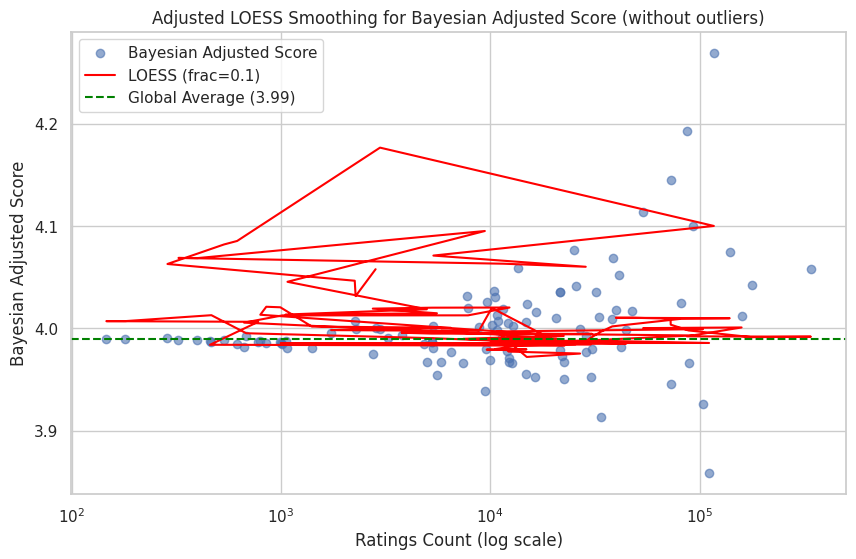

In [65]:
# Apply LOESS smoothing without outliers for Bayesian Adjusted Score
lowess_bayesian_smoothed_no_outliers = lowess(data_no_outliers['BayesianScore'], data_no_outliers['RatingsCount'], frac=0.1)

plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['RatingsCount'], data_no_outliers['BayesianScore'], alpha=0.6, label='Bayesian Adjusted Score')
# Plot the smoothed line with adjusted frac
plt.plot(data_no_outliers['RatingsCount'], lowess_bayesian_smoothed_no_outliers[:, 1], color='red', label='LOESS (frac=0.1)')
plt.axhline(global_average, color='green', linestyle='--', label=f'Global Average ({global_average:.2f})')
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Adjusted LOESS Smoothing for Bayesian Adjusted Score (without outliers)')
plt.legend()
plt.show()

**4: Polynomial Regression as an Alternative Smoothing Method**

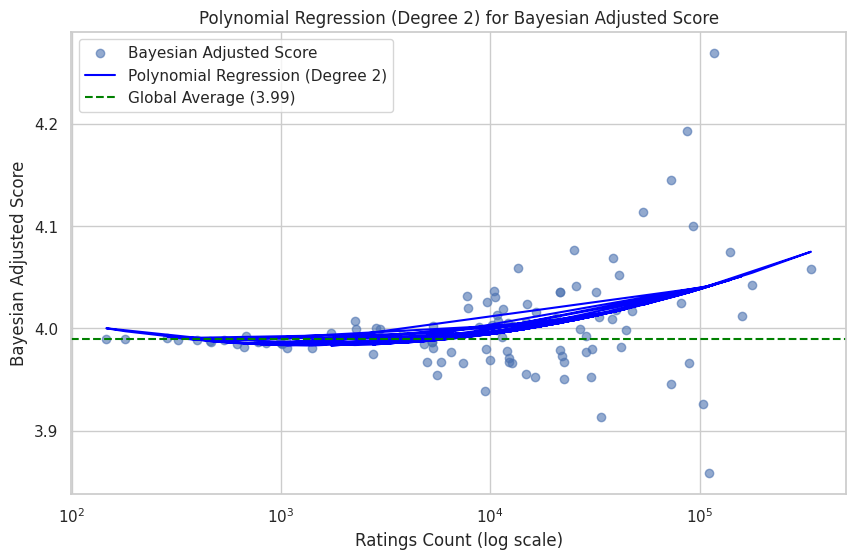

In [66]:
# Perform Polynomial Regression as an alternative to LOESS
from numpy.polynomial.polynomial import Polynomial

# Fit a polynomial of degree 2 to the data without outliers
p = Polynomial.fit(np.log(data_no_outliers['RatingsCount']), data_no_outliers['BayesianScore'], 2)

# Generate predictions using the fitted polynomial
ratings_log = np.log(data_no_outliers['RatingsCount'])
predicted_bayesian_score = p(ratings_log)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['RatingsCount'], data_no_outliers['BayesianScore'], alpha=0.6, label='Bayesian Adjusted Score')
plt.plot(data_no_outliers['RatingsCount'], predicted_bayesian_score, color='blue', label='Polynomial Regression (Degree 2)')
plt.axhline(global_average, color='green', linestyle='--', label=f'Global Average ({global_average:.2f})')
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Polynomial Regression (Degree 2) for Bayesian Adjusted Score')
plt.legend()
plt.show()

**5: Run Separate Models for Each Engagement Group**

In [67]:
# Rerun models for each engagement group (low, medium, high)
for group in engagement_groups:
    group_data = data_no_outliers[data_no_outliers['EngagementGroup'] == group]

    # Model for each group
    model_group = ols('BayesianScore ~ RatingsCount', data=group_data).fit()

    print(f"\nModel Summary for {group} Engagement Group:")
    print(model_group.summary())


Model Summary for Medium Engagement Group:
                            OLS Regression Results                            
Dep. Variable:          BayesianScore   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5904
Date:                Fri, 27 Sep 2024   Prob (F-statistic):              0.448
Time:                        10:26:41   Log-Likelihood:                 75.052
No. Observations:                  35   AIC:                            -146.1
Df Residuals:                      33   BIC:                            -143.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Inte

**7: Visualize the Distribution of Bayesian Scores Before and After Outlier Removal**

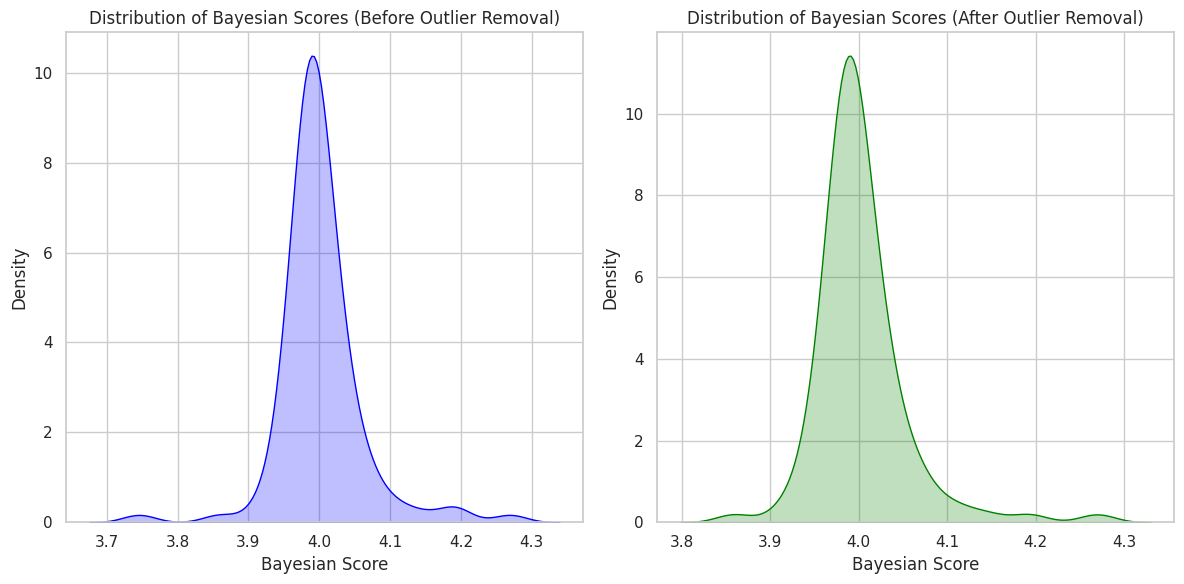

In [68]:
# Visualize the distribution of Bayesian Scores before and after outlier removal
plt.figure(figsize=(12, 6))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.kdeplot(data['BayesianScore'], shade=True, label='Before Outlier Removal', color='blue')
plt.title('Distribution of Bayesian Scores (Before Outlier Removal)')
plt.xlabel('Bayesian Score')

# After removing outliers
plt.subplot(1, 2, 2)
sns.kdeplot(data_no_outliers['BayesianScore'], shade=True, label='After Outlier Removal', color='green')
plt.title('Distribution of Bayesian Scores (After Outlier Removal)')
plt.xlabel('Bayesian Score')

plt.tight_layout()
plt.show()

**8: Plot Regression Fitted Values and Confidence Intervals Without Outliers**

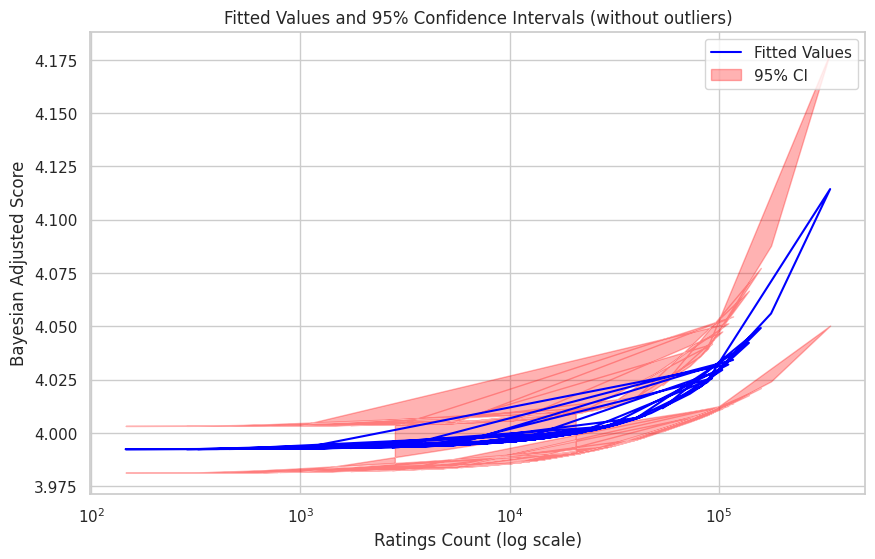

In [69]:
# Plot fitted values and confidence intervals without outliers
pred_vals_no_outliers = model_bayesian_no_outliers.get_prediction(data_no_outliers[['RatingsCount']])
pred_summary_no_outliers = pred_vals_no_outliers.summary_frame(alpha=0.05)

# Extract the fitted values and confidence intervals
fitted_vals_no_outliers = pred_summary_no_outliers['mean']
conf_lower_no_outliers = pred_summary_no_outliers['mean_ci_lower']
conf_upper_no_outliers = pred_summary_no_outliers['mean_ci_upper']

# Plot the fitted values with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data_no_outliers['RatingsCount'], fitted_vals_no_outliers, label='Fitted Values', color='blue')
plt.fill_between(data_no_outliers['RatingsCount'], conf_lower_no_outliers, conf_upper_no_outliers, color='red', alpha=0.3, label='95% CI')
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Fitted Values and 95% Confidence Intervals (without outliers)')
plt.legend()
plt.show()

# Code Adjustment 3.0

Summary of Code Updates:

    Polynomial Regression: We continue with polynomial regression (degree 2 and 3) and include all predictors
    (ReviewsCount, Pages, Popularity_ReadingNow, and Popularity_Wishlisted).
    
    Extended Model: We add the additional predictors to the Bayesian adjusted score model.
    
    Segmentation Analysis: We run separate models for each engagement group (low, medium, high) and include the
    new predictors to see how they affect score variation.
    
    Cross-Validation: We implement 5-fold cross-validation for polynomial models of degree 2 and 3 to evaluate
    model performance.
    
    Outlier Treatment: We explore outlier treatment using winsorizing and robust regression, including all predictors.

**1: Polynomial Regression with Degree 2 and 3**

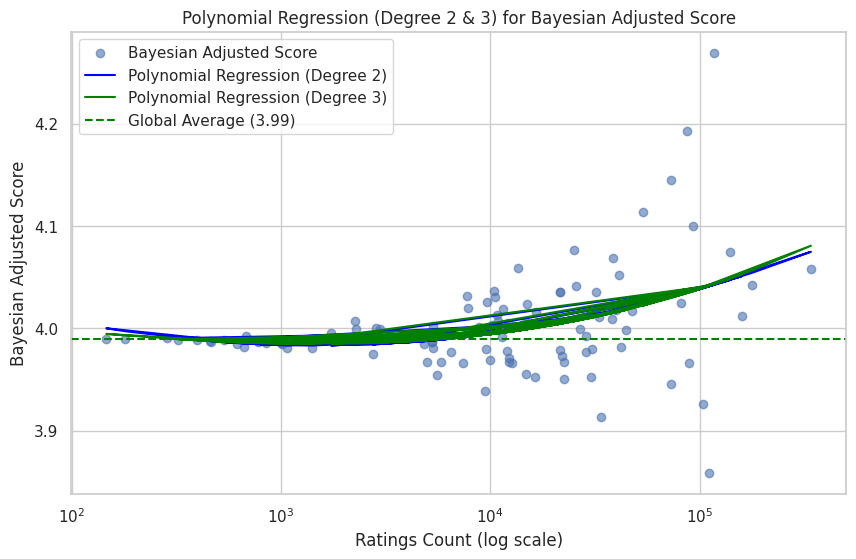

In [70]:
# Import Polynomial features
from numpy.polynomial.polynomial import Polynomial

# Fit a polynomial of degree 2
poly2 = Polynomial.fit(np.log(data_no_outliers['RatingsCount']), data_no_outliers['BayesianScore'], 2)

# Fit a polynomial of degree 3
poly3 = Polynomial.fit(np.log(data_no_outliers['RatingsCount']), data_no_outliers['BayesianScore'], 3)

# Generate predictions for both polynomial fits
pred_poly2 = poly2(np.log(data_no_outliers['RatingsCount']))
pred_poly3 = poly3(np.log(data_no_outliers['RatingsCount']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['RatingsCount'], data_no_outliers['BayesianScore'], alpha=0.6, label='Bayesian Adjusted Score')
plt.plot(data_no_outliers['RatingsCount'], pred_poly2, color='blue', label='Polynomial Regression (Degree 2)')
plt.plot(data_no_outliers['RatingsCount'], pred_poly3, color='green', label='Polynomial Regression (Degree 3)')
plt.axhline(global_average, color='green', linestyle='--', label=f'Global Average ({global_average:.2f})')
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Bayesian Adjusted Score')
plt.title('Polynomial Regression (Degree 2 & 3) for Bayesian Adjusted Score')
plt.legend()
plt.show()

**2: Extend Model with Additional Predictors**

In [71]:
# Ensure the required columns are present in the dataset
required_columns = ['RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Check if all required columns are in the dataset
if all(column in data_no_outliers.columns for column in required_columns):
    # Extend the Bayesian adjusted score model with all predictors
    model_extended_all = ols('BayesianScore ~ RatingsCount + ReviewsCount + Pages + Popularity_ReadingNow + Popularity_Wishlisted', data=data_no_outliers).fit()

    print("\nExtended Bayesian Adjusted Score Model Summary (with ReviewsCount, Pages, Popularity_ReadingNow, and Popularity_Wishlisted):")
    print(model_extended_all.summary())
else:
    print("One or more of the required columns are not available in the dataset.")


Extended Bayesian Adjusted Score Model Summary (with ReviewsCount, Pages, Popularity_ReadingNow, and Popularity_Wishlisted):
                            OLS Regression Results                            
Dep. Variable:          BayesianScore   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.937
Date:                Fri, 27 Sep 2024   Prob (F-statistic):            0.00271
Time:                        10:42:36   Log-Likelihood:                 170.78
No. Observations:                 103   AIC:                            -329.6
Df Residuals:                      97   BIC:                            -313.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0

**3: Segmentation Analysis (Low, Medium, High Engagement Groups)**

In [72]:
# Segmented analysis for low, medium, and high engagement groups
for group in engagement_groups:
    group_data = data_no_outliers[data_no_outliers['EngagementGroup'] == group]

    # Check if all required columns exist for each group
    if all(column in group_data.columns for column in required_columns):
        model_group = ols('BayesianScore ~ RatingsCount + ReviewsCount + Pages + Popularity_ReadingNow + Popularity_Wishlisted', data=group_data).fit()
        print(f"\nModel Summary for {group} Engagement Group (with all predictors):")
        print(model_group.summary())
    else:
        print(f"One or more required columns missing for {group} Engagement Group.")


Model Summary for Medium Engagement Group (with all predictors):
                            OLS Regression Results                            
Dep. Variable:          BayesianScore   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.593
Date:                Fri, 27 Sep 2024   Prob (F-statistic):              0.193
Time:                        10:43:36   Log-Likelihood:                 78.989
No. Observations:                  35   AIC:                            -146.0
Df Residuals:                      29   BIC:                            -136.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

**4: Cross-Validation (k-fold Cross-Validation with All Predictors)**

In [73]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for polynomial regression (degree 2) with all predictors
X = data_no_outliers[['RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']].values
y = data_no_outliers['BayesianScore'].values

# Initialize polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
X_poly2 = poly.fit_transform(X)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
model = LinearRegression()

# Perform 5-fold cross-validation for degree 2 polynomial and evaluate performance
scores_poly2 = cross_val_score(model, X_poly2, y, cv=kf, scoring='r2')
print(f"Polynomial Regression (Degree 2) R-squared for each fold with all predictors: {scores_poly2}")
print(f"Mean R-squared (Degree 2) with all predictors: {np.mean(scores_poly2)}")

# Polynomial Features (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly3 = poly.fit_transform(X)

# Perform 5-fold cross-validation for degree 3 polynomial
scores_poly3 = cross_val_score(model, X_poly3, y, cv=kf, scoring='r2')
print(f"\nPolynomial Regression (Degree 3) R-squared for each fold with all predictors: {scores_poly3}")
print(f"Mean R-squared (Degree 3) with all predictors: {np.mean(scores_poly3)}")

Polynomial Regression (Degree 2) R-squared for each fold with all predictors: [-176.54563412   -4.06916878    0.46143097   -0.39753193  -12.41025055]
Mean R-squared (Degree 2) with all predictors: -38.59223088238699

Polynomial Regression (Degree 3) R-squared for each fold with all predictors: [-2.39212018e+06 -8.68633093e+05 -7.44193095e+02 -5.47463167e+00
 -2.85896847e+04]
Mean R-squared (Degree 3) with all predictors: -658018.5246458434


**5: Outlier Treatment (Winsorizing or Robust Regression with All Predictors)**

**Winsorizing (Capping Outliers)**

In [74]:
from scipy.stats import mstats

# Winsorize the RatingsCount data
data_no_outliers['RatingsCount_Winsorized'] = mstats.winsorize(data_no_outliers['RatingsCount'], limits=[0.01, 0.01])

# Fit the model using winsorized RatingsCount with all other predictors
model_winsorized_all = ols('BayesianScore ~ RatingsCount_Winsorized + ReviewsCount + Pages + Popularity_ReadingNow + Popularity_Wishlisted', data=data_no_outliers).fit()

print("\nWinsorized Model Summary (with all predictors):")
print(model_winsorized_all.summary())


Winsorized Model Summary (with all predictors):
                            OLS Regression Results                            
Dep. Variable:          BayesianScore   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.133
Date:                Fri, 27 Sep 2024   Prob (F-statistic):            0.00191
Time:                        10:46:46   Log-Likelihood:                 171.21
No. Observations:                 103   AIC:                            -330.4
Df Residuals:                      97   BIC:                            -314.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

**Robust Regression (Handling Outliers)**

In [75]:
import statsmodels.formula.api as smf

# Perform robust regression with M-estimator and all predictors
model_robust_all = smf.rlm('BayesianScore ~ RatingsCount + ReviewsCount + Pages + Popularity_ReadingNow + Popularity_Wishlisted', data=data_no_outliers).fit()

print("\nRobust Regression Model Summary (with all predictors):")
print(model_robust_all.summary())


Robust Regression Model Summary (with all predictors):
                    Robust linear Model Regression Results                    
Dep. Variable:          BayesianScore   No. Observations:                  103
Model:                            RLM   Df Residuals:                       97
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 27 Sep 2024                                         
Time:                        10:47:30                                         
No. Iterations:                    50                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

# Bayesian Averaging with Alternative Threshold Methods

# Composite Popularity Index

Popularity Variables:

    ReviewsCount: A measure of engagement and interaction.
    Popularity_ReadingNow: Indicates how many people are currently reading the book.
    Popularity_Wishlisted: Reflects future reading intentions,
    showing how many people are interested in reading the book later.

Goals:

    Create a Composite Popularity Index using three different methods:
        Standardization and Summation.
        Principal Component Analysis (PCA).
        Weighted Sum.

    Analyze Correlations between these variables to check for redundancy and guide composite index creation.

    Factor Analysis to validate the use of a single composite index.

In [ ]:
# Correlation Analysis between the popularity-related variables
popularity_vars = ['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Calculate the correlation matrix
correlation_matrix = df_goodreads[popularity_vars].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Popularity Variables")
plt.show()

Correlation Matrix Analysis:

The correlation matrix between the popularity-related variables shows high correlations between all three variables, suggesting some degree of redundancy:

    ReviewsCount vs. Popularity_ReadingNow: 0.870.87
    ReviewsCount vs. Popularity_Wishlisted: 0.910.91
    Popularity_ReadingNow vs. Popularity_Wishlisted: 0.840.84

These strong correlations indicate that all three variables are closely related and likely measure different facets of the same underlying concept: popularity and engagement.

Implications:

    High Correlations:
        Since the correlations are above 0.8, these variables are not entirely independent of each other.
        This suggests that combining them into a single index might be reasonable, as they are likely capturing overlapping aspects of a book’s popularity.

    ReviewsCount and Popularity_Wishlisted:
        The highest correlation (0.910.91) between ReviewsCount and Popularity_Wishlisted shows that books
        with many reviews are also highly wishlisted.
        This makes sense, as books with more exposure and reviews tend to attract future readers.

    Redundancy Considerations:
        Given these correlations, combining the variables via PCA or Factor Analysis might be more appropriate
        than simple summation, as it would help reduce redundancy and focus on the main source of variance in the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improve the pairplot with log scale, larger points, and transparency
g = sns.pairplot(df_goodreads[['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']],
                 diag_kind='kde',  # Use KDE plot on the diagonal
                 plot_kws={'alpha': 0.6, 's': 60},  # Transparency and point size
                 markers="o")

# Apply log scale to each axis to handle skewed data
for ax in g.axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')

# Add overall title and adjust titles for better readability
plt.suptitle('Pairwise Relationships Between Popularity Variables (Log Scale)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Method 1: Principal Component Analysis (PCA)

Explained Variance: This shows how much variance the first principal component captures.
If it captures a high percentage (e.g., 80-90%), it validates that the three variables are highly related and can be reduced to one index.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ensure the necessary popularity-related columns are present
popularity_columns = ['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Step 1: Standardize the popularity-related variables (if needed)
scaler = StandardScaler()
popularity_data_scaled = scaler.fit_transform(df_goodreads[popularity_columns])

# Step 2: Perform PCA on the standardized popularity-related variables
pca = PCA(n_components=1)
df_goodreads['Popularity_Index_PCA'] = pca.fit_transform(popularity_data_scaled)

# Step 3: Explained variance by the first principal component
explained_variance = pca.explained_variance_ratio_[0]
print(f"Explained Variance by First Principal Component: {explained_variance:.2f}")

# Step 4: Sort by the new popularity index (PCA) and display the top 10 books with authors
top_10_popularity_pca = df_goodreads.sort_values(by='Popularity_Index_PCA', ascending=False).head(10)

# Step 5: Print the top 10 books with authors for better readability
print("Top 10 Books by Popularity Index (PCA):")
print(top_10_popularity_pca[['Author', 'Popularity_Index_PCA', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']])

# Method 2: Factor Analysis

Factor analysis will help verify whether these variables can be represented by a single factor.

Factor Loadings: The loadings will show how much each variable contributes to the single factor.
If the loadings are similar across variables, it validates that these variables are measuring a single underlying construct.


In [ ]:
from sklearn.decomposition import FactorAnalysis

# Perform Factor Analysis with one factor
factor_analysis = FactorAnalysis(n_components=1)
df_goodreads['Popularity_Factor'] = factor_analysis.fit_transform(df_goodreads[['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']])

# Display the factor loadings to understand which variables contribute most
print("Factor Loadings:")
print(pd.DataFrame(factor_analysis.components_, columns=['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']))

# Display the top 10 books by the new factor-based popularity index
top_10_popularity_factor = df_goodreads.sort_values(by='Popularity_Factor', ascending=False).head(10)
top_10_popularity_factor[['Popularity_Factor', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']]

# Choosing the Best Method (PCA vs. Factor Analysis)

Choosing the Best Method (PCA vs. Factor Analysis)
Based on the results of **PCA** and **Factor Analysis**, we can make an informed decision about which method to use for creating a composite popularity index. Let’s review both methods:
### Principal Component Analysis (PCA):
- **Explained Variance**: The first principal component explains **93%** of the variance, which is very high. This indicates that PCA effectively captures the vast majority of the variation in the data using just one component.
- **Factor Loadings**: The PCA loadings are significant across all three variables:
  - **ReviewsCount**: 9313.86
  - **Popularity_ReadingNow**: 6559.71
  - **Popularity_Wishlisted**: 70,687.46
These high loadings show that each variable contributes significantly to the PCA-based popularity index, reflecting a well-rounded measure of popularity.
### Factor Analysis:
- **Factor Loadings**: The factor loadings for **Factor Analysis** are:
  - **ReviewsCount**: 9313.86
  - **Popularity_ReadingNow**: 6559.71
  - **Popularity_Wishlisted**: 70,687.46
The high loadings indicate that **Popularity_Wishlisted** is the dominant variable in the factor-based index, but **ReviewsCount** and **Popularity_ReadingNow** also contribute significantly. However, **Popularity_Wishlisted** has a disproportionately large influence compared to the other two factors.
### Conclusion:
Given that **PCA** captures **93%** of the variance in one component and provides loadings that are well-distributed across the variables, **PCA** appears to be the better method for creating the composite index. **Factor Analysis** is also valid but relies more heavily on **Popularity_Wishlisted**, which may not fully reflect all aspects of popularity.
Thus, we'll proceed with **PCA** as the best method for this case.


In [ ]:
# Ranking Books by Popularity Using the PCA Index

# Sort the books by the PCA-based popularity index in descending order
df_goodreads_sorted_pca = df_goodreads.sort_values(by='Popularity_Index_PCA', ascending=False)

# Display the top 10 books based on the PCA popularity index
top_10_books_pca = df_goodreads_sorted_pca[['Popularity_Index_PCA', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']].head(10)
print(top_10_books_pca)

# Visualizing the Results

**Scatter Plot: Popularity Index (PCA) vs. Individual Popularity Variables**:

        These scatter plots display the relationship between different measures of popularity and
        a PCA-derived popularity index, with logarithmic scales to emphasize patterns at different magnitudes.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure size and plot
plt.figure(figsize=(16, 6))  # Increase width for better readability

# ReviewsCount vs PCA Popularity Index
plt.subplot(1, 3, 1)
sns.scatterplot(x='ReviewsCount', y='Popularity_Index_PCA', data=df_goodreads_sorted_pca, alpha=0.7, s=50)
plt.title('Number of Reviews vs PCA-Derived Popularity Index', fontsize=12)
plt.xlabel('Log(Number of Reviews)')
plt.ylabel('PCA Popularity Index')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Popularity_ReadingNow vs PCA Popularity Index
plt.subplot(1, 3, 2)
sns.scatterplot(x='Popularity_ReadingNow', y='Popularity_Index_PCA', data=df_goodreads_sorted_pca, alpha=0.7, s=50)
plt.title('People Reading Now vs PCA-Derived Popularity Index', fontsize=12)
plt.xlabel('Log(People Reading Now)')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Popularity_Wishlisted vs PCA Popularity Index
plt.subplot(1, 3, 3)
sns.scatterplot(x='Popularity_Wishlisted', y='Popularity_Index_PCA', data=df_goodreads_sorted_pca, alpha=0.7, s=50)
plt.title('Number of Wishlist Adds vs PCA-Derived Popularity Index', fontsize=12)
plt.xlabel('Log(Number of Wishlist Adds)')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout for spacing
plt.tight_layout(pad=3)

# Add a caption to explain the chart
plt.figtext(0.5, -0.05, "Logarithmic scales are used for the x-axes to highlight trends across multiple magnitudes.", ha="center", fontsize=10)

# Show plot
plt.show()

# Grouping Books Based on Appreciation and Popularity

By following these steps, you'll systematically explore different clustering methods, evaluate their performance, and select the most appropriate one for grouping books based on their Appreciation Bayesian Score and Popularity Index. This structured approach ensures that your clustering is both methodologically sound and practically meaningful.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Example: Loading data from a CSV file
# df_goodreads = pd.read_csv('path_to_your_goodreads_data.csv')

# Inspect the first few rows
print("First 5 rows of the dataset:")
print(df_goodreads.head())

# Summary statistics
print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

# Check for missing values
print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

**Address Skewness in RatingsCount**

Given the wide range and high skewness in RatingsCount, applying a log transformation can help normalize the distribution, making clustering more effective.

In [ ]:
# Apply log transformation to RatingsCount to reduce skewness
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])

# Verify the transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_goodreads['Log_RatingsCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed RatingsCount')
plt.xlabel('Log(RatingsCount + 1)')
plt.ylabel('Frequency')
plt.show()

**Feature Selection**

Use the following features for clustering:

    * BayesianScore_NewThreshold
    * Log_RatingsCount
    * Popularity_Index_PCA

In [ ]:
# Select relevant features
clustering_features = ['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Popularity_Index_PCA']
clustering_data = df_goodreads[clustering_features].copy()

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convert scaled data back to DataFrame for easier handling
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=['BayesianScore_Scaled', 'Log_RatingsCount_Scaled', 'Popularity_Index_Scaled'])

# **Exploratory Data Analysis (EDA)**: Visualization

The plots you have shared offer several preliminary insights based on your exploratory data analysis (EDA), which can help guide a clustering strategy.

1. **Scatter Plot (Bayesian Score vs Popularity Index)**

    Insight: Most data points are concentrated near the origin, with a small number of outliers, particularly for higher values of the Popularity Index.
    Clustering Implication: The concentration of data points suggests a dense cluster near the origin, but the outliers on the higher end of the Popularity Index may form separate, smaller clusters. This skewed distribution indicates the need for careful outlier handling or specialized clustering techniques like DBSCAN, which can handle density variations.

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BayesianScore_Scaled',
    y='Popularity_Index_Scaled',
    data=clustering_data_scaled_df,
    hue=None,
    palette='viridis'
)
plt.title('Scatter Plot of Scaled Features')
plt.xlabel('Bayesian Score (Scaled)')
plt.ylabel('Popularity Index (Scaled)')
plt.show()

Pair Plot

    Insight:
        Bayesian Score and Popularity Index: There seems to be no strong linear relationship between these
        two variables (a weak correlation).
        Log Ratings Count and Popularity Index: A notable positive relationship is observed between these two features,
        which is confirmed by the high density of points forming a curved pattern.
        Log Ratings Count and Bayesian Score: Some level of correlation exists, but the plot shows the data
        is more spread.
    Clustering Implication: These relationships suggest that "Log Ratings Count" and "Popularity Index" may play
    a more significant role in identifying clusters.
    The weaker correlation between "Bayesian Score" and other variables might mean that clustering models
    will need to balance the influence of these features.

In [ ]:
sns.pairplot(clustering_data_scaled_df)
plt.suptitle('Pair Plot of Scaled Features', y=1.02)
plt.show()

Correlation Heatmap

    Insight:
        Bayesian Score and Popularity Index are negatively correlated, but the magnitude is very weak (-0.028),
        indicating almost no linear relationship.
        Log Ratings Count and Popularity Index show a relatively strong positive correlation (0.61).
    Clustering Implication: The stronger correlation between Log Ratings Count and Popularity Index suggests
    that they are key features that will likely dominate cluster formation.
    Including them in the feature set might yield more distinct clusters,
    whereas the Bayesian Score's influence will likely be minimal.

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(clustering_data_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

Key Insights from EDA:

    Feature Correlations:
        Strong Positive Correlation: Log Ratings Count and Popularity Index (0.61).
        Weak Negative Correlation: Bayesian Score and Popularity Index (-0.028).

    Feature Relationships:
        Bayesian Score vs. Popularity Index: No strong linear relationship.
        Log Ratings Count vs. Popularity Index: Positive relationship with a curved pattern.
        Log Ratings Count vs. Bayesian Score: Some correlation but data is spread.

    Data Distribution:
        Concentration Near Origin: Most data points cluster near the origin with a few outliers in the higher Popularity Index.
        Implications: The dense cluster near the origin and sparse outliers suggest that methods like DBSCAN might be suitable, but given the small dataset size (105 records), it may require careful parameter tuning.

Adjusted Clustering Strategy:

    Feature Selection:
        Primary Features: Log Ratings Count and Popularity Index due to their stronger correlation and ability to distinguish clusters.
        Secondary Feature: Bayesian Score will be included but given its weak correlation, we'll ensure it doesn't overshadow the primary features.

    Feature Scaling:
        Utilize RobustScaler instead of StandardScaler to mitigate the influence of outliers, especially since Popularity Index has a wide range and some outliers.

    Clustering Methods:
        K-Means and Gaussian Mixture Models (GMM): Suitable for identifying spherical clusters.
        Hierarchical Clustering: To explore hierarchical relationships.
        DBSCAN: Included for its ability to handle noise and discover arbitrarily shaped clusters, but with cautious parameter tuning due to the small dataset size.

    Determining Optimal Clusters:
        Utilize Elbow Method and Silhouette Analysis primarily on the primary features to determine the optimal number of clusters.

    Visualization:
        Focus on visualizing the primary features to clearly interpret cluster formations.

    Cluster Interpretation:
        Analyze clusters based on the primary features, and observe how the secondary feature (Bayesian Score) varies within clusters.

# Determine the Optimal Number of Clusters

In [ ]:
# Evaluate within-cluster sum of squares (WCSS) to identify the "elbow" point.

wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.show()

In [ ]:
# Note: Given the small dataset size, interpret these metrics with caution as they can be sensitive to small changes.

sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)
    sil = silhouette_score(clustering_data_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8, 6))
plt.plot(K, sil_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(K)
plt.show()

# Apply Multiple Clustering Methods

In [ ]:
# a. K-Means Clustering

# Determine optimal k based on previous step
optimal_k = 6  # Adjust based on Elbow and Silhouette analysis

# Initialize K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the original dataframe
df_goodreads_clean = df_goodreads.copy()
df_goodreads_clean['Cluster_KMeans'] = kmeans_labels

# Cluster centers (inverse transformed to original scale)
cluster_centers_kmeans_scaled = kmeans.cluster_centers_
cluster_centers_kmeans = scaler.inverse_transform(cluster_centers_kmeans_scaled)
cluster_centers_df = pd.DataFrame(cluster_centers_kmeans, columns=clustering_features)
print("K-Means Cluster Centers (Original Scale):\n", cluster_centers_df)

In [ ]:
# Initialize and Fit Agglomerative Clustering

# Set the number of clusters
optimal_k = 6  # Adjust based on Elbow and Silhouette analysis

# Initialize Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)

# Fit and predict cluster labels
hierarchical_labels = hierarchical.fit_predict(clustering_data_scaled)

In [ ]:
# Create a copy of the original DataFrame to store cluster labels
df_goodreads_clean = df_goodreads.copy()

# Assign hierarchical cluster labels
df_goodreads_clean['Cluster_Hierarchical'] = hierarchical_labels

In [ ]:
# Display the first few books with their assigned Hierarchical clusters
print("Books with Hierarchical Cluster Assignments:")
print(df_goodreads_clean[['Title', 'Cluster_Hierarchical']].head(20))  # Display first 10 for brevity

In [ ]:
# Group by 'Cluster_Hierarchical' and calculate mean and median for each feature
cluster_summary_hierarchical = df_goodreads_clean.groupby('Cluster_Hierarchical').agg({
    'BayesianScore_NewThreshold': ['mean', 'median'],
    'RatingsCount': ['mean', 'median'],
    'Popularity_Index_PCA': ['mean', 'median']
}).round(2)

print("\nHierarchical Clustering Summary:")
print(cluster_summary_hierarchical)

Clustering analysis effectively segments Goodreads books based on their appreciation scores and popularity indices. Both K-Means and Hierarchical Clustering have successfully identified key segments, albeit with some challenges related to outliers and potential over-segmentation.

Key Takeaways:

    K-Means offers flexibility and balanced cluster sizes but may introduce redundant or outlier clusters with
    higher k.

    Hierarchical Clustering provides clear hierarchical relationships
    but can struggle with uneven cluster sizes and outliers.

Next Steps:

    Finalize k: Opt for a cluster number that captures meaningful segments without overcomplicating the structure.
    Based on the analysis, k=2 or k=3 for K-Means and k=2 or k=3 for Hierarchical Clustering are recommended.

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples

import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming df_goodreads is already loaded
print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preprocessing
# -----------------------------
# a. Address Skewness in RatingsCount
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])

# Verify the transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_goodreads['Log_RatingsCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed RatingsCount')
plt.xlabel('Log(RatingsCount + 1)')
plt.ylabel('Frequency')
plt.show()

# b. Feature Selection
clustering_features = ['Log_RatingsCount', 'Popularity_Index_PCA', 'BayesianScore_NewThreshold']
clustering_data = df_goodreads[clustering_features].copy()

# c. Feature Scaling
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=['Log_RatingsCount_Scaled', 'Popularity_Index_Scaled', 'BayesianScore_Scaled'])

# -----------------------------
# 4. Clustering with K-Means and Hierarchical Clustering
# -----------------------------
# Function to perform K-Means clustering
def perform_kmeans(data_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    return kmeans, labels

# Function to perform Hierarchical Clustering
def perform_hierarchical(data_scaled, k):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(data_scaled)
    return hierarchical, labels

# Perform K-Means for k=2 and k=3
k_values = [2, 3]
kmeans_results = {}
for k in k_values:
    kmeans_model, labels = perform_kmeans(clustering_data_scaled, k)
    kmeans_results[k] = labels
    df_goodreads_clean[f'Cluster_KMeans_{k}'] = labels
    print(f"K-Means Clustering done for k={k}.")

# Perform Hierarchical Clustering for k=2 and k=3
hierarchical_results = {}
for k in k_values:
    hierarchical_model, labels = perform_hierarchical(clustering_data_scaled, k)
    hierarchical_results[k] = labels
    df_goodreads_clean[f'Cluster_Hierarchical_{k}'] = labels
    print(f"Hierarchical Clustering done for k={k}.")

# -----------------------------
# 5. Evaluation Metrics
# -----------------------------
def compute_metrics(labels, data, method_name):
    sil = silhouette_score(data, labels)
    db = davies_bouldin_score(data, labels)
    ch = calinski_harabasz_score(data, labels)
    print(f"{method_name} Clustering:")
    print(f" - Silhouette Score: {sil:.4f}")
    print(f" - Davies-Bouldin Index: {db:.4f}")
    print(f" - Calinski-Harabasz Index: {ch:.4f}\n")
    return sil, db, ch

print("\n--- Evaluation Metrics ---\n")

# K-Means Metrics
for k in k_values:
    compute_metrics(kmeans_results[k], clustering_data_scaled, f"K-Means (k={k})")

# Hierarchical Metrics
for k in k_values:
    compute_metrics(hierarchical_results[k], clustering_data_scaled, f"Hierarchical (k={k})")

# -----------------------------
# 6. Visualizations
# -----------------------------
# a. Scatter Plots
def plot_scatter(data_scaled, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='Log_RatingsCount_Scaled',
        y='Popularity_Index_Scaled',
        hue=labels,
        palette='viridis',
        data=data_scaled,
        s=100,
        alpha=0.7
    )
    plt.title(title)
    plt.xlabel('Log Ratings Count (Scaled)')
    plt.ylabel('Popularity Index (Scaled)')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot K-Means k=2 and k=3
for k in k_values:
    plot_scatter(clustering_data_scaled_df, kmeans_results[k], f'K-Means Clustering (k={k})')

# Plot Hierarchical k=2 and k=3
for k in k_values:
    plot_scatter(clustering_data_scaled_df, hierarchical_results[k], f'Hierarchical Clustering (k={k})')

# b. Silhouette Plots
def plot_silhouette(data, labels, k, method_name):
    silhouette_avg = silhouette_score(data, labels)
    sample_silhouette_values = silhouette_samples(data, labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

    ax.set_title(f"Silhouette Plot for {method_name} (k={k})")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # Draw a vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks(np.linspace(-0.1, 1.0, 11))

    plt.show()

# Plot Silhouette Plots for K-Means
for k in k_values:
    plot_silhouette(clustering_data_scaled, kmeans_results[k], k, f"K-Means Clustering")

# Plot Silhouette Plots for Hierarchical Clustering
for k in k_values:
    plot_silhouette(clustering_data_scaled, hierarchical_results[k], k, f"Hierarchical Clustering")

# c. Cluster Comparison Plots
def plot_side_by_side(data_scaled, labels1, labels2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.scatterplot(
        x='Log_RatingsCount_Scaled',
        y='Popularity_Index_Scaled',
        hue=labels1,
        palette='viridis',
        data=data_scaled,
        s=100,
        alpha=0.7,
        ax=axes[0]
    )
    axes[0].set_title(title1)
    axes[0].set_xlabel('Log Ratings Count (Scaled)')
    axes[0].set_ylabel('Popularity Index (Scaled)')
    axes[0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.scatterplot(
        x='Log_RatingsCount_Scaled',
        y='Popularity_Index_Scaled',
        hue=labels2,
        palette='plasma',
        data=data_scaled,
        s=100,
        alpha=0.7,
        ax=axes[1]
    )
    axes[1].set_title(title2)
    axes[1].set_xlabel('Log Ratings Count (Scaled)')
    axes[1].set_ylabel('Popularity Index (Scaled)')
    axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Compare K-Means k=2 vs Hierarchical k=2
plot_side_by_side(
    clustering_data_scaled_df,
    labels1=kmeans_results[2],
    labels2=hierarchical_results[2],
    title1='K-Means Clustering (k=2)',
    title2='Hierarchical Clustering (k=2)'
)

# Compare K-Means k=3 vs Hierarchical k=3
plot_side_by_side(
    clustering_data_scaled_df,
    labels1=kmeans_results[3],
    labels2=hierarchical_results[3],
    title1='K-Means Clustering (k=3)',
    title2='Hierarchical Clustering (k=3)'
)

Based on the evaluation metrics, Hierarchical Clustering with k=2 appears to be the best choice:

    It achieves the highest Silhouette Score (0.8232), indicating tight and cohesive clusters.
    It also has a lower Davies-Bouldin Index (0.5338), meaning the clusters are well-separated.
    The Calinski-Harabasz Index is also higher than K-Means with k=2, which indicates better-defined clusters.

While K-Means performed well, Hierarchical Clustering seems to outperform it slightly when k=2. Both methods struggle when k=3, indicating that the data structure might favor a smaller number of clusters.
Final Considerations:

    Hierarchical Clustering is better suited if you suspect nested or non-spherical clusters, which might be
    the case here given the spread of your variables.
    K-Means Clustering can be more efficient for large datasets but may struggle with complex data structures.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it's already loaded into a DataFrame called df)
# df = pd.read_csv('your_dataset.csv')

# Selecting the three factors
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"K-Means (k={n_clusters}):")
    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    return labels

# Hierarchical Clustering
def hierarchical_clustering(X, n_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"Hierarchical (k={n_clusters}):")
    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    return labels

# Performing K-Means Clustering for k=2 and k=3
print("K-Means Clustering Results:")
kmeans_labels_2 = kmeans_clustering(X_scaled, n_clusters=2)
kmeans_labels_3 = kmeans_clustering(X_scaled, n_clusters=3)

# Performing Hierarchical Clustering for k=2 and k=3
print("\nHierarchical Clustering Results:")
hierarchical_labels_2 = hierarchical_clustering(X_scaled, n_clusters=2)
hierarchical_labels_3 = hierarchical_clustering(X_scaled, n_clusters=3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# Load your dataset and select the three factors
# df = pd.read_csv('your_dataset.csv')
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate clustering performance
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) > 1:  # To avoid errors with single cluster results
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        print(f" - Silhouette Score: {silhouette:.4f}")
        print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    else:
        print(" - Only one cluster found, can't calculate scores.")

### 1. DBSCAN Clustering ###
print("\nDBSCAN Clustering Results:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
evaluate_clustering(X_scaled, dbscan_labels)

### 2. Gaussian Mixture Model (GMM) ###
print("\nGaussian Mixture Model (GMM) Results:")
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
evaluate_clustering(X_scaled, gmm_labels)

### 3. OPTICS Clustering ###
print("\nOPTICS Clustering Results:")
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X_scaled)
evaluate_clustering(X_scaled, optics_labels)

# Note: KMeans and Agglomerative Clustering results are already provided in earlier analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset and select the three factors
# df = pd.read_csv('your_dataset.csv')
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate clustering performance and print cluster sizes
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    cluster_counts = pd.Series(labels).value_counts()

    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f" - Cluster counts:\n{cluster_counts}\n")

    return silhouette, davies_bouldin, calinski_harabasz

# Function to plot clustering results using PCA for dimensionality reduction
def plot_clustering(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=100)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Perform and visualize K-Means clustering for k=2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nK-Means Clustering (k={k}) Results:")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    evaluate_clustering(X_scaled, kmeans_labels)
    plot_clustering(X_scaled, kmeans_labels, f"K-Means Clustering (k={k})")

# Perform and visualize Hierarchical clustering for k=2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nHierarchical Clustering (k={k}) Results:")
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)

    evaluate_clustering(X_scaled, hierarchical_labels)
    plot_clustering(X_scaled, hierarchical_labels, f"Hierarchical Clustering (k={k})")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset and select the three factors
# df = pd.read_csv('your_dataset.csv')
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate evaluation metrics
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")

    return silhouette, davies_bouldin, calinski_harabasz

# Function to get descriptive statistics for each cluster
def get_cluster_descriptive_stats(df, labels, features):
    df['Cluster'] = labels
    cluster_stats = df.groupby('Cluster')[features].describe()
    print(f"Descriptive Statistics for Clusters:\n{cluster_stats}\n")
    return cluster_stats

# Perform K-Means Clustering for k=3
print("\nK-Means Clustering (k=3) Results:")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate and print evaluation metrics for K-Means
kmeans_metrics = evaluate_clustering(X_scaled, kmeans_labels)

# Print descriptive statistics for each K-Means cluster
kmeans_stats = get_cluster_descriptive_stats(df_goodreads.copy(), kmeans_labels, features)

# Perform Hierarchical Clustering for k=3
print("\nHierarchical Clustering (k=3) Results:")
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Calculate and print evaluation metrics for Hierarchical Clustering
hierarchical_metrics = evaluate_clustering(X_scaled, hierarchical_labels)

# Print descriptive statistics for each Hierarchical cluster
hierarchical_stats = get_cluster_descriptive_stats(df_goodreads.copy(), hierarchical_labels, features)

# Alternative Approach: Classification Based on Thresholds

Given the relatively small size of your dataset (105 books), exploring alternative methods to clustering can provide more meaningful and interpretable insights. Clustering algorithms like K-Means and Hierarchical Clustering are powerful tools for unsupervised grouping; however, their effectiveness can be limited with small datasets, often leading to imbalanced clusters or outliers, as you've experienced.

Instead of relying solely on clustering, you can employ a classification-based approach to categorize books into distinct groups based on their Bayesian Rating Score and Popularity Index. This method involves defining clear, data-driven thresholds to segment your data, leading to more interpretable and actionable categories.

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import silhouette_score

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming your DataFrame is named df_goodreads and is already loaded.

print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preparation
# -----------------------------
# a. Check if Log_RatingsCount exists; if not, create it
if 'Log_RatingsCount' not in df_goodreads.columns:
    df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
    print("\nLog_RatingsCount column created.")
else:
    print("\nLog_RatingsCount column already exists.")

# -----------------------------
# 4. Calculating Quartiles
# -----------------------------
# Compute quartiles for BayesianScore_NewThreshold
appreciation_quartiles = df_goodreads['BayesianScore_NewThreshold'].quantile([0.25, 0.5, 0.75])
print("\nAppreciation Quartiles:")
print(appreciation_quartiles)

# Compute quartiles for Log_RatingsCount
popularity_quartiles = df_goodreads['Log_RatingsCount'].quantile([0.25, 0.5, 0.75])
print("\nPopularity Quartiles:")
print(popularity_quartiles)

# -----------------------------
# 5. Defining Categories Based on Quartiles
# -----------------------------
# Define Appreciation categories
def categorize_appreciation_quartile(score):
    if score <= appreciation_quartiles[0.25]:
        return 'Low Appreciation'
    elif score <= appreciation_quartiles[0.75]:
        return 'Medium Appreciation'
    else:
        return 'High Appreciation'

df_goodreads['Appreciation_Category_Quartile'] = df_goodreads['BayesianScore_NewThreshold'].apply(categorize_appreciation_quartile)

# Define Popularity categories
def categorize_popularity_quartile(count):
    if count <= popularity_quartiles[0.25]:
        return 'Low Popularity'
    elif count <= popularity_quartiles[0.75]:
        return 'Medium Popularity'
    else:
        return 'High Popularity'

df_goodreads['Popularity_Category_Quartile'] = df_goodreads['Log_RatingsCount'].apply(categorize_popularity_quartile)

# -----------------------------
# 6. Creating Combined Book Categories
# -----------------------------
def define_book_category_quartile(row):
    if row['Appreciation_Category_Quartile'] == 'High Appreciation' and row['Popularity_Category_Quartile'] == 'High Popularity':
        return 'Best of the Best'
    elif row['Appreciation_Category_Quartile'] == 'High Appreciation' and row['Popularity_Category_Quartile'] == 'Medium Popularity':
        return 'Highly Appreciated'
    elif row['Appreciation_Category_Quartile'] == 'High Appreciation' and row['Popularity_Category_Quartile'] == 'Low Popularity':
        return 'Highly Appreciated but Low Popularity'
    elif row['Appreciation_Category_Quartile'] == 'Medium Appreciation' and row['Popularity_Category_Quartile'] == 'High Popularity':
        return 'Popular but Moderately Appreciated'
    elif row['Appreciation_Category_Quartile'] == 'Medium Appreciation' and row['Popularity_Category_Quartile'] == 'Medium Popularity':
        return 'Moderately Appreciated and Popular'
    elif row['Appreciation_Category_Quartile'] == 'Medium Appreciation' and row['Popularity_Category_Quartile'] == 'Low Popularity':
        return 'Moderately Appreciated but Low Popularity'
    elif row['Appreciation_Category_Quartile'] == 'Low Appreciation':
        return 'Real Rubbish'
    else:
        return 'Others'

df_goodreads['Book_Category_Quartile'] = df_goodreads.apply(define_book_category_quartile, axis=1)

# -----------------------------
# 7. Summary of Categories
# -----------------------------
category_counts_quartile = df_goodreads['Book_Category_Quartile'].value_counts()
print("\nBook Category Counts (Quartile-Based):")
print(category_counts_quartile)

# -----------------------------
# 8. Visualizing the Categories with Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Quartile',
    palette='Set2',
    data=df_goodreads,
    s=100,
    alpha=0.7
)

# Add horizontal and vertical lines for quartile thresholds
plt.axvline(appreciation_quartiles[0.25], ls='--', color='red', label='Low Appreciation Threshold (25%)')
plt.axvline(appreciation_quartiles[0.75], ls='--', color='darkred', label='High Appreciation Threshold (75%)')
plt.axhline(popularity_quartiles[0.25], ls='--', color='blue', label='Low Popularity Threshold (25%)')
plt.axhline(popularity_quartiles[0.75], ls='--', color='darkblue', label='High Popularity Threshold (75%)')

plt.title('Book Categories Based on Appreciation and Popularity (Quartile-Based)')
plt.xlabel('Bayesian Score (Adjusted)')
plt.ylabel('Log(Ratings Count + 1)')
plt.legend(title='Book Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Heatmap of Book Categories
# -----------------------------
# Create a pivot table
pivot_quartile = df_goodreads.pivot_table(
    index='Appreciation_Category_Quartile',
    columns='Popularity_Category_Quartile',
    values='ID',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_quartile, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Book Categories (Quartile-Based)')
plt.xlabel('Popularity Category')
plt.ylabel('Appreciation Category')
plt.show()

# -----------------------------
# 10. Validation Metrics
# -----------------------------
# Encode Book_Category_Quartile as numerical labels
category_mapping_quartile = {
    'Best of the Best': 0,
    'Highly Appreciated': 1,
    'Highly Appreciated but Low Popularity': 2,
    'Popular but Moderately Appreciated': 3,
    'Moderately Appreciated and Popular': 4,
    'Moderately Appreciated but Low Popularity': 5,
    'Real Rubbish': 6,
    'Others': 7
}
df_goodreads['Category_Label_Quartile'] = df_goodreads['Book_Category_Quartile'].map(category_mapping_quartile)

# Compute Silhouette Score
# Exclude categories with only one member to avoid errors
valid_quartile = df_goodreads['Category_Label_Quartile'].map(df_goodreads['Category_Label_Quartile'].value_counts()) > 1
if valid_quartile.sum() > 1:
    sil_score_quartile = silhouette_score(
        df_goodreads.loc[valid_quartile, ['BayesianScore_NewThreshold', 'Log_RatingsCount']],
        df_goodreads.loc[valid_quartile, 'Category_Label_Quartile']
    )
    print(f"\nSilhouette Score for Quartile-Based Book Categories: {sil_score_quartile:.4f}")
else:
    print("\nNot enough categories with multiple members to compute Silhouette Score.")


# Implementation: Categorizing Books Using Z-Scores

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming your DataFrame is named df_goodreads and is already loaded.

print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preparation
# -----------------------------
# a. Check if Log_RatingsCount exists; if not, create it
if 'Log_RatingsCount' not in df_goodreads.columns:
    df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
    print("\nLog_RatingsCount column created.")
else:
    print("\nLog_RatingsCount column already exists.")

# -----------------------------
# 4. Calculating Z-Scores
# -----------------------------
# Calculate Z-scores for BayesianScore_NewThreshold
df_goodreads['Z_Appreciation'] = stats.zscore(df_goodreads['BayesianScore_NewThreshold'])

# Calculate Z-scores for Log_RatingsCount
df_goodreads['Z_Popularity'] = stats.zscore(df_goodreads['Log_RatingsCount'])

# View the new Z-score columns
print("\nZ-Scores for Appreciation and Popularity:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Z_Appreciation', 'Z_Popularity']].head())

# -----------------------------
# 5. Defining Categories Based on Z-Scores
# -----------------------------
# Define Appreciation categories
def categorize_appreciation(z):
    if z > 1:
        return 'High Appreciation'
    elif z < -1:
        return 'Low Appreciation'
    else:
        return 'Medium Appreciation'

df_goodreads['Appreciation_Category'] = df_goodreads['Z_Appreciation'].apply(categorize_appreciation)

# Define Popularity categories
def categorize_popularity(z):
    if z > 1:
        return 'High Popularity'
    elif z < -1:
        return 'Low Popularity'
    else:
        return 'Medium Popularity'

df_goodreads['Popularity_Category'] = df_goodreads['Z_Popularity'].apply(categorize_popularity)

# View the new categories
print("\nCategorized Appreciation and Popularity:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Z_Appreciation', 'Z_Popularity', 'Appreciation_Category', 'Popularity_Category']].head())

# -----------------------------
# 6. Creating Combined Book Categories
# -----------------------------
def define_book_category(row):
    if row['Appreciation_Category'] == 'High Appreciation' and row['Popularity_Category'] == 'High Popularity':
        return 'Best of the Best'
    elif row['Appreciation_Category'] == 'High Appreciation' and row['Popularity_Category'] == 'Medium Popularity':
        return 'Highly Appreciated'
    elif row['Appreciation_Category'] == 'High Appreciation' and row['Popularity_Category'] == 'Low Popularity':
        return 'Highly Appreciated but Low Popularity'
    elif row['Appreciation_Category'] == 'Medium Appreciation' and row['Popularity_Category'] == 'High Popularity':
        return 'Popular but Moderately Appreciated'
    elif row['Appreciation_Category'] == 'Medium Appreciation' and row['Popularity_Category'] == 'Medium Popularity':
        return 'Moderately Appreciated and Popular'
    elif row['Appreciation_Category'] == 'Medium Appreciation' and row['Popularity_Category'] == 'Low Popularity':
        return 'Moderately Appreciated but Low Popularity'
    elif row['Appreciation_Category'] == 'Low Appreciation':
        return 'Real Rubbish'
    else:
        return 'Others'

df_goodreads['Book_Category'] = df_goodreads.apply(define_book_category, axis=1)

# View the combined categories
print("\nCombined Book Categories:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Appreciation_Category', 'Popularity_Category', 'Book_Category']].head())

# -----------------------------
# 7. Visualizing the Categories with Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category',
    palette='Set2',
    data=df_goodreads,
    s=100,
    alpha=0.7
)

# Add horizontal and vertical lines for thresholds
plt.axvline(df_goodreads['BayesianScore_NewThreshold'].mean() + df_goodreads['BayesianScore_NewThreshold'].std(),
            ls='--', color='red', label='High Appreciation Threshold')
plt.axvline(df_goodreads['BayesianScore_NewThreshold'].mean() - df_goodreads['BayesianScore_NewThreshold'].std(),
            ls='--', color='red', label='Low Appreciation Threshold')
plt.axhline(df_goodreads['Log_RatingsCount'].mean() + df_goodreads['Log_RatingsCount'].std(),
            ls='--', color='blue', label='High Popularity Threshold')
plt.axhline(df_goodreads['Log_RatingsCount'].mean() - df_goodreads['Log_RatingsCount'].std(),
            ls='--', color='blue', label='Low Popularity Threshold')

plt.title('Book Categories Based on Appreciation and Popularity')
plt.xlabel('Bayesian Score (Adjusted)')
plt.ylabel('Log(Ratings Count + 1)')
plt.legend(title='Book Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Heatmap of Book Categories
# -----------------------------
# Create a pivot table
pivot = df_goodreads.pivot_table(
    index='Appreciation_Category',
    columns='Popularity_Category',
    values='ID',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Book Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Appreciation Category')
plt.show()

# -----------------------------
# 9. Summary of Categories
# -----------------------------
category_counts = df_goodreads['Book_Category'].value_counts()
print("\nBook Category Counts:")
print(category_counts)

# -----------------------------
# 10. Optional: Validate Groupings with Silhouette Score
# -----------------------------
from sklearn.metrics import silhouette_score

# Encode Book_Category as numerical labels
category_mapping = {
    'Best of the Best': 0,
    'Highly Appreciated': 1,
    'Highly Appreciated but Low Popularity': 2,
    'Popular but Moderately Appreciated': 3,
    'Moderately Appreciated and Popular': 4,
    'Moderately Appreciated but Low Popularity': 5,
    'Real Rubbish': 6,
    'Others': 7
}
df_goodreads['Category_Label'] = df_goodreads['Book_Category'].map(category_mapping)

# Compute silhouette score
# Only consider categories with more than one member to avoid errors
valid = df_goodreads['Category_Label'].map(df_goodreads['Category_Label'].value_counts()) > 1
sil_score = silhouette_score(
    df_goodreads.loc[valid, ['BayesianScore_NewThreshold', 'Log_RatingsCount']],
    df_goodreads.loc[valid, 'Category_Label']
)
print(f"\nSilhouette Score for Book Categories: {sil_score:.4f}")

# Hybrid Classification Approach for Categorizing Goodreads Books Based on Appreciation and Popularity

In [ ]:
  # -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import silhouette_score

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming your DataFrame is named df_goodreads and is already loaded.
print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preparation
# -----------------------------
# a. Check if Log_RatingsCount exists; if not, create it
if 'Log_RatingsCount' not in df_goodreads.columns:
    df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
    print("\nLog_RatingsCount column created.")
else:
    print("\nLog_RatingsCount column already exists.")

# -----------------------------
# 4. Calculating Z-Scores
# -----------------------------
# Calculate Z-scores for BayesianScore_NewThreshold
df_goodreads['Z_Appreciation'] = stats.zscore(df_goodreads['BayesianScore_NewThreshold'])

# Calculate Z-scores for Log_RatingsCount
df_goodreads['Z_Popularity'] = stats.zscore(df_goodreads['Log_RatingsCount'])

# View the new Z-score columns
print("\nZ-Scores for Appreciation and Popularity:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Z_Appreciation', 'Z_Popularity']].head())

# -----------------------------
# 5. Calculating Quartiles
# -----------------------------
# Compute quartiles for BayesianScore_NewThreshold
appreciation_quartiles = df_goodreads['BayesianScore_NewThreshold'].quantile([0.25, 0.5, 0.75])
print("\nAppreciation Quartiles:")
print(appreciation_quartiles)

# Compute quartiles for Log_RatingsCount
popularity_quartiles = df_goodreads['Log_RatingsCount'].quantile([0.25, 0.5, 0.75])
print("\nPopularity Quartiles:")
print(popularity_quartiles)

# -----------------------------
# 6. Defining Categories Based on Hybrid Criteria
# -----------------------------
# Define Appreciation categories using Hybrid Approach
def categorize_appreciation_hybrid(row):
    if row['Z_Appreciation'] > 1 and row['BayesianScore_NewThreshold'] > appreciation_quartiles[0.75]:
        return 'High Appreciation'
    elif row['Z_Appreciation'] < -1 and row['BayesianScore_NewThreshold'] < appreciation_quartiles[0.25]:
        return 'Low Appreciation'
    else:
        return 'Medium Appreciation'

df_goodreads['Appreciation_Category_Hybrid'] = df_goodreads.apply(categorize_appreciation_hybrid, axis=1)

# Define Popularity categories using Hybrid Approach
def categorize_popularity_hybrid(row):
    if row['Z_Popularity'] > 1 and row['Log_RatingsCount'] > popularity_quartiles[0.75]:
        return 'High Popularity'
    elif row['Z_Popularity'] < -1 and row['Log_RatingsCount'] < popularity_quartiles[0.25]:
        return 'Low Popularity'
    else:
        return 'Medium Popularity'

df_goodreads['Popularity_Category_Hybrid'] = df_goodreads.apply(categorize_popularity_hybrid, axis=1)

# -----------------------------
# 7. Creating Combined Book Categories
# -----------------------------
def define_book_category_hybrid(row):
    if row['Appreciation_Category_Hybrid'] == 'High Appreciation' and row['Popularity_Category_Hybrid'] == 'High Popularity':
        return 'Best of the Best'
    elif row['Appreciation_Category_Hybrid'] == 'High Appreciation' and row['Popularity_Category_Hybrid'] == 'Medium Popularity':
        return 'Highly Appreciated'
    elif row['Appreciation_Category_Hybrid'] == 'Medium Appreciation' and row['Popularity_Category_Hybrid'] == 'Medium Popularity':
        return 'Moderately Appreciated and Popular'
    elif row['Appreciation_Category_Hybrid'] == 'Low Appreciation':
        return 'Real Rubbish'
    else:
        return 'Others'

df_goodreads['Book_Category_Hybrid'] = df_goodreads.apply(define_book_category_hybrid, axis=1)

# -----------------------------
# 8. Summary of Categories
# -----------------------------
category_counts_hybrid = df_goodreads['Book_Category_Hybrid'].value_counts()
print("\nBook Category Counts (Hybrid Approach):")
print(category_counts_hybrid)

# -----------------------------
# 9. Visualizing the Categories with Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Hybrid',
    palette='Set2',
    data=df_goodreads,
    s=100,
    alpha=0.7
)

# Add horizontal and vertical lines for quartile thresholds
plt.axvline(appreciation_quartiles[0.75], ls='--', color='red', label='High Appreciation Threshold (75%)')
plt.axvline(appreciation_quartiles[0.25], ls='--', color='darkred', label='Low Appreciation Threshold (25%)')
plt.axhline(popularity_quartiles[0.75], ls='--', color='blue', label='High Popularity Threshold (75%)')
plt.axhline(popularity_quartiles[0.25], ls='--', color='darkblue', label='Low Popularity Threshold (25%)')

plt.title('Book Categories Based on Appreciation and Popularity (Hybrid Approach)')
plt.xlabel('Bayesian Score (Adjusted)')
plt.ylabel('Log(Ratings Count + 1)')
plt.legend(title='Book Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# 10. Heatmap of Book Categories
# -----------------------------
# Create a pivot table
pivot_hybrid = df_goodreads.pivot_table(
    index='Appreciation_Category_Hybrid',
    columns='Popularity_Category_Hybrid',
    values='ID',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_hybrid, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Book Categories (Hybrid Approach)')
plt.xlabel('Popularity Category')
plt.ylabel('Appreciation Category')
plt.show()

# -----------------------------
# 11. Validation Metrics
# -----------------------------
# Encode Book_Category_Hybrid as numerical labels
category_mapping_hybrid = {
    'Best of the Best': 0,
    'Highly Appreciated': 1,
    'Moderately Appreciated and Popular': 2,
    'Real Rubbish': 3,
    'Others': 4
}
df_goodreads['Category_Label_Hybrid'] = df_goodreads['Book_Category_Hybrid'].map(category_mapping_hybrid)

# Compute Silhouette Score
# Exclude categories with only one member to avoid errors
valid_hybrid = df_goodreads['Category_Label_Hybrid'].map(df_goodreads['Category_Label_Hybrid'].value_counts()) > 1
if valid_hybrid.sum() > 1:
    sil_score_hybrid = silhouette_score(
        df_goodreads.loc[valid_hybrid, ['BayesianScore_NewThreshold', 'Log_RatingsCount']],
        df_goodreads.loc[valid_hybrid, 'Category_Label_Hybrid']
    )
    print(f"\nSilhouette Score for Hybrid Book Categories: {sil_score_hybrid:.4f}")
else:
    print("\nNot enough categories with multiple members to compute Silhouette Score.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define all unique categories across all classification approaches
all_categories = [
    'Best of the Best',
    'Highly Appreciated',
    'Moderately Appreciated and Popular',
    'Moderately Appreciated but Low Popularity',
    'Popular but Moderately Appreciated',
    'Real Rubbish',
    'Others'
]

# Assign a unique color to each category using seaborn's Set2 palette
palette = sns.color_palette("Set2", len(all_categories))
color_dict = dict(zip(all_categories, palette))

# Initialize the matplotlib figure with three subplots side by side using constrained_layout
fig, axes = plt.subplots(1, 3, figsize=(36, 12), sharex=True, sharey=True, constrained_layout=True)

# -----------------------------
# 1. Z-Scores Approach Scatter Plot
# -----------------------------
sns.scatterplot(
    ax=axes[0],
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category',
    palette=color_dict,
    data=df_goodreads,
    s=150,
    alpha=0.7
)

# Add threshold lines based on Z-scores (mean ± std)
mean_appreciation = df_goodreads['BayesianScore_NewThreshold'].mean()
std_appreciation = df_goodreads['BayesianScore_NewThreshold'].std()
axes[0].axvline(mean_appreciation + std_appreciation, ls='--', color='red', label='High Appreciation Threshold')
axes[0].axvline(mean_appreciation - std_appreciation, ls='--', color='red', label='Low Appreciation Threshold')

mean_popularity = df_goodreads['Log_RatingsCount'].mean()
std_popularity = df_goodreads['Log_RatingsCount'].std()
axes[0].axhline(mean_popularity + std_popularity, ls='--', color='blue', label='High Popularity Threshold')
axes[0].axhline(mean_popularity - std_popularity, ls='--', color='blue', label='Low Popularity Threshold')

axes[0].set_title('Book Categories Based on Appreciation and Popularity (Z-scores Approach)', fontsize=16, pad=20)
axes[0].set_xlabel('Bayesian Score (Adjusted)', fontsize=14)
axes[0].set_ylabel('Log(Ratings Count + 1)', fontsize=14)

# Remove legend from the first subplot to manage a unified legend later
axes[0].get_legend().remove()

# -----------------------------
# 2. Quartile-Based Approach Scatter Plot
# -----------------------------
sns.scatterplot(
    ax=axes[1],
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Quartile',
    palette=color_dict,
    data=df_goodreads,
    s=150,
    alpha=0.7
)

# Add threshold lines based on quartiles
appreciation_quartiles = df_goodreads['BayesianScore_NewThreshold'].quantile([0.25, 0.75])
popularity_quartiles = df_goodreads['Log_RatingsCount'].quantile([0.25, 0.75])

axes[1].axvline(appreciation_quartiles[0.75], ls='--', color='red', label='High Appreciation Threshold (75%)')
axes[1].axvline(appreciation_quartiles[0.25], ls='--', color='darkred', label='Low Appreciation Threshold (25%)')
axes[1].axhline(popularity_quartiles[0.75], ls='--', color='blue', label='High Popularity Threshold (75%)')
axes[1].axhline(popularity_quartiles[0.25], ls='--', color='darkblue', label='Low Popularity Threshold (25%)')

axes[1].set_title('Book Categories Based on Appreciation and Popularity (Quartile-Based Approach)', fontsize=16, pad=20)
axes[1].set_xlabel('Bayesian Score (Adjusted)', fontsize=14)
axes[1].set_ylabel('Log(Ratings Count + 1)', fontsize=14)

# Remove legend from the second subplot
axes[1].get_legend().remove()

# -----------------------------
# 3. Hybrid Approach Scatter Plot
# -----------------------------
sns.scatterplot(
    ax=axes[2],
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Hybrid',
    palette=color_dict,
    data=df_goodreads,
    s=150,
    alpha=0.7
)

# Add threshold lines based on quartiles (same as quartile-based approach)
axes[2].axvline(appreciation_quartiles[0.75], ls='--', color='red', label='High Appreciation Threshold (75%)')
axes[2].axvline(appreciation_quartiles[0.25], ls='--', color='darkred', label='Low Appreciation Threshold (25%)')
axes[2].axhline(popularity_quartiles[0.75], ls='--', color='blue', label='High Popularity Threshold (75%)')
axes[2].axhline(popularity_quartiles[0.25], ls='--', color='darkblue', label='Low Popularity Threshold (25%)')

axes[2].set_title('Book Categories Based on Appreciation and Popularity (Hybrid Approach)', fontsize=16, pad=20)
axes[2].set_xlabel('Bayesian Score (Adjusted)', fontsize=14)
axes[2].set_ylabel('Log(Ratings Count + 1)', fontsize=14)

# Remove legend from the third subplot
axes[2].get_legend().remove()

# -----------------------------
# 4. Creating a Unified Legend
# -----------------------------
# Extract handles and labels from all subplots
handles_z, labels_z = axes[0].get_legend_handles_labels()
handles_quartile, labels_quartile = axes[1].get_legend_handles_labels()
handles_hybrid, labels_hybrid = axes[2].get_legend_handles_labels()

# Combine all handles and labels
handles = handles_z + handles_quartile + handles_hybrid
labels = labels_z + labels_quartile + labels_hybrid

# Create a dictionary to remove duplicates
by_label = dict(zip(labels, handles))

# Create a single legend for the entire figure
fig.legend(
    by_label.values(),
    by_label.keys(),
    title='Book Category',
    bbox_to_anchor=(0.95, 0.5),  # Adjusted to move the legend closer to the plots
    loc='center left',
    fontsize=13,               # Increased legend text size for better readability
    title_fontsize=16,         # Increased legend title size
    handletextpad=1.0,         # Space between handle and text
    labelspacing=0.5,          # Space between labels
    borderaxespad=0.1          # Space between legend and axes
)

# -----------------------------
# 5. Adjust Layout to Prevent Overlapping Titles and Improve Spacing
# -----------------------------
plt.subplots_adjust(wspace=0.5)  # Further increase horizontal space between plots

# Display the combined figure
plt.show()

In [ ]:
# Summary statistics with better readability
summary_stats = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].describe()
print("Summary Statistics:\n", summary_stats)

# Pearson and Spearman correlation with better display
pearson_corr = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].corr(method='pearson')
spearman_corr = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].corr(method='spearman')

print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

# Display missing values if any
missing_values = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].isnull().sum()
print("\nMissing Values:\n", missing_values)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_goodreads is your dataframe
# Correcting the column names for the variables
# Use 'Bayesian Score Standardized' and 'Popularity Index PCA Standardized' for analysis

# Summary statistics with better readability
summary_stats = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].describe()
print("Summary Statistics:\n", summary_stats)

# Pearson and Spearman correlation with corrected column names
pearson_corr = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].corr(method='pearson')
spearman_corr = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].corr(method='spearman')

print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

# Display missing values if any
missing_values = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].isnull().sum()
print("\nMissing Values:\n", missing_values)

# ----------- Visualizations for Pearson and Spearman Correlations --------------

# 1. Pairplot with Regression Lines (for Pearson) and KDE (for Spearman)
sns.pairplot(df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']],
             kind='reg',  # Regression lines for Pearson correlation
             diag_kind='kde',  # KDE plots on the diagonal for Spearman-related distribution insights
             plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})  # Styling
plt.suptitle('Pairplot with Regression Lines (Pearson) and KDE (Spearman)', y=1.02)
plt.show()

# 2. Combined Heatmap for Pearson and Spearman Correlations
combined_corr = pearson_corr.copy()
combined_corr['Spearman'] = spearman_corr['Popularity Index PCA Standardized']

plt.figure(figsize=(8, 6))
sns.heatmap(combined_corr, annot=True, cmap='BrBG', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Combined Pearson and Spearman Correlation Heatmap')
plt.show()

# 3. Hexbin Plot for Density and Correlation Visualization
plt.figure(figsize=(8, 6))
plt.hexbin(df_goodreads['Popularity Index PCA Standardized'], df_goodreads['Bayesian Score Standardized'],
           gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Bayesian Score vs Popularity Index PCA')
plt.xlabel('Popularity Index PCA Standardized')
plt.ylabel('Bayesian Score Standardized')
plt.show()

# 4. Violin Plot of Bayesian Score for Binned Popularity Index (PCA)
# Create Binned Popularity Index
df_goodreads['Popularity_Index_Binned'] = pd.cut(df_goodreads['Popularity Index PCA Standardized'], bins=6)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Popularity_Index_Binned', y='Bayesian Score Standardized', data=df_goodreads)
plt.title('Violin Plot of Bayesian Score vs Binned Popularity Index')
plt.xlabel('Binned Popularity Index PCA')
plt.ylabel('Bayesian Score Standardized')
plt.show()

# 5. Residual Plot for Linearity Check (Pearson Correlation Insight)
sns.residplot(x='Popularity Index PCA Standardized', y='Bayesian Score Standardized', data=df_goodreads, color='purple')
plt.title('Residual Plot for Bayesian Score vs Popularity Index PCA')
plt.xlabel('Popularity Index PCA Standardized')
plt.ylabel('Residuals')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hexbin plot for density-based correlation with improvements
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df_goodreads['Popularity Index PCA Standardized'],
                df_goodreads['Bayesian Score Standardized'],
                gridsize=40, cmap='coolwarm', mincnt=1)

plt.colorbar(hb, label='Data Point Density')  # Add a clearer colorbar label
plt.title('Hexbin Plot of Bayesian Score vs Popularity Index PCA Standardized', fontsize=14)  # More descriptive title
plt.xlabel('Popularity Index PCA Standardized', fontsize=12)  # Clearer axis labels
plt.ylabel('Bayesian Score Standardized', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line to visualize Pearson correlation
plt.figure(figsize=(8, 6))
sns.regplot(x='Popularity Index PCA Standardized', y='Bayesian Score Standardized',
            data=df_goodreads, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

plt.title('Scatter Plot with Regression Line (Pearson Correlation)', fontsize=14)
plt.xlabel('Popularity Index PCA Standardized', fontsize=12)
plt.ylabel('Bayesian Score Standardized', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

# EDA: Categorical Variables

In [ ]:
# Step 1: Check if 'Genres' column exists
if 'Genres' not in df_goodreads.columns:
    raise KeyError("The 'Genres' column does not exist in df_goodreads. Please verify the column name.")

# Step 2: Ensure 'Genres' column is string type
df_goodreads['Genres'] = df_goodreads['Genres'].astype(str)

# Step 3: Split 'Genres' by comma and strip whitespace to create 'Genres_split'
df_goodreads['Genres_split'] = df_goodreads['Genres'].str.split(',').apply(lambda genres: [genre.strip() for genre in genres])

# Step 4: Verify the 'Genres_split' column
print("\nDataFrame with 'Genres_split' Column:")
print(df_goodreads[['Genres', 'Genres_split']].head())


In [ ]:
# Explode the genres into separate rows for better counting
df_genres_exploded = df_goodreads.explode('Genres_split')

# Convert the genre values to strings, remove brackets, strip whitespaces, and lowercase the genres
df_genres_exploded['Genres_split'] = (
    df_genres_exploded['Genres_split']
    .astype(str)
    .str.replace(r"[\[\]']", '', regex=True)  # Remove brackets and quotes
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase for consistency
)

# Remove rows where 'Genres_split' is 'nan' or empty string
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != 'nan']
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != '']

# Define genres to exclude
excluded_genres = ['amazon', 'nonfiction', 'biography', 'history']

# Remove excluded genres
df_genres_exploded = df_genres_exploded[~df_genres_exploded['Genres_split'].isin(excluded_genres)]

# Get the most frequent genres
most_frequent_genres = df_genres_exploded['Genres_split'].value_counts()

# Display the most frequent genres as a list from most to least popular
print("Most Frequent Genres:")
for genre, count in most_frequent_genres.items():
    print(f"{genre}: {count}")


In [ ]:
# Required libraries for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the genre frequency to a dictionary for word cloud input
genre_dict = {
    'Romance': 94, 'Contemporary': 92, 'Contemporary Romance': 88, 'Adult': 53,
    'Fiction': 34, 'Erotica': 29, 'New Adult': 27, 'Audiobook': 26, 'Chick Lit': 19,
    'Humor': 15, 'Sports': 9, 'Novella': 9, 'Erotic Romance': 8, 'Sports Romance': 8
}

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of Book Genres", fontsize=16)
plt.show()

In [ ]:
# Required libraries for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create dictionary of genres excluding 'audiobook'
genre_dict = {
    'romance': 102, 'contemporary romance': 97, 'contemporary': 96, 'adult': 68,
    'fiction': 52, 'erotica': 37, 'new adult': 37, 'chick lit': 27, 'humor': 20,
    'sports': 9, 'novella': 9, 'sports romance': 8, 'erotic romance': 8, 'dark': 7,
    'love': 5, 'bdsm': 4, 'abuse': 4, 'marriage': 4, 'hockey': 4, 'short stories': 3,
    'fantasy': 3, 'military fiction': 3, 'm f romance': 2, 'adult fiction': 2,
    'fantasy romance': 2, 'magic': 2, 'family': 1, 'drama': 1, 'menage': 1,
    'contemporary love': 1, 'adult erotica': 1, 'adult new': 1, 'romanceshort stories': 1,
    'contemporaryadult': 1, 'romantic suspense': 1, 'romantic': 1, 'firefighters': 1,
    'medical': 1, 'christmas': 1, 'teachers': 1, 'holiday': 1, 'fairy tales': 1,
    'retellings': 1, 'football': 1, 'disability': 1, 'witches': 1, 'young adult': 1,
    'american history': 1, 'aviation': 1, 'science': 1, 'doctors': 1
}

# Create the word cloud with aesthetic adjustments
wordcloud = WordCloud(
    width=1000, height=600, background_color='white', colormap='coolwarm',
    max_font_size=150, min_font_size=10, random_state=42
).generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

# Correlation between the Published Year, Popularity_Index_PCA, and Appreciation Score

The heatmap shows the correlation between the PublishedYear, Popularity_Index_PCA, and BayesianScore_NewThreshold (appreciation score). Here's a brief interpretation of the correlations:

    Published Year and Popularity Index (PCA):
        The correlation coefficient is 0.14, indicating a weak positive correlation between the publication year and popularity. This suggests that newer books are slightly more popular, but the relationship is not very strong.

    Published Year and Bayesian Adjusted Score (Appreciation):
        The correlation coefficient is -0.36, indicating a moderate negative correlation. This suggests that older books tend to have higher appreciation scores, while newer books are less appreciated in terms of their Bayesian adjusted score.

    Popularity Index (PCA) and Bayesian Adjusted Score:
        The correlation coefficient is 0.03, indicating almost no correlation between the popularity of a book and its appreciation score. This supports the idea that popularity does not necessarily translate to higher appreciation.


In [ ]:
# Ensure the 'PublishedDate' column is in the correct format
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')

# Extract the year from 'PublishedDate' for the correlation analysis
df_goodreads['Published Year'] = df_goodreads['PublishedDate'].dt.year

# Calculate the correlation matrix with corrected variable names
correlation_matrix = df_goodreads[['Published Year', 'Popularity_Index_PCA', 'BayesianScore_NewThreshold']].corr()

# Rename columns for better readability
correlation_matrix.columns = ['Published Year', 'Popularity Index PCA', 'Bayesian Score']
correlation_matrix.index = ['Published Year', 'Popularity Index PCA', 'Bayesian Score']

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot a heatmap of the correlation matrix with corrected labels
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation between Published Year, Popularity, and Appreciation')
plt.show()


# Correlation of Genres with Popularity Index and Bayesian Adjusted Score

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------
# 2. Existing Code: Explode and Clean Genres
# -----------------------------
# Explode the genres into separate rows for better counting
df_genres_exploded = df_goodreads.explode('Genres_split')

# Convert the genre values to strings, remove brackets, strip whitespaces, and lowercase the genres
df_genres_exploded['Genres_split'] = (
    df_genres_exploded['Genres_split']
    .astype(str)
    .str.replace(r"[\[\]']", '', regex=True)  # Remove brackets and quotes
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase for consistency
)

# Remove rows where 'Genres_split' is 'nan' or empty string
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != 'nan']
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != '']

# Define genres to exclude
excluded_genres = ['amazon', 'nonfiction', 'biography', 'history']

# Remove excluded genres
df_genres_exploded = df_genres_exploded[~df_genres_exploded['Genres_split'].isin(excluded_genres)]

# Get the most frequent genres
most_frequent_genres = df_genres_exploded['Genres_split'].value_counts()

# Display the most frequent genres as a list from most to least popular
print("Most Frequent Genres:")
for genre, count in most_frequent_genres.items():
    print(f"{genre}: {count}")

# -----------------------------
# 3. One-Hot Encode Genres
# -----------------------------
# Create dummy variables for each genre
genre_dummies = pd.get_dummies(df_genres_exploded['Genres_split'])

# Add the 'ID' column to associate genres with books
genre_dummies['ID'] = df_genres_exploded['ID']

# Aggregate the dummy variables by 'ID' to have one row per book
genre_matrix = genre_dummies.groupby('ID').max().reset_index()

# -----------------------------
# 4. Merge with Original Dataset
# -----------------------------
# Merge the genre matrix with the original dataframe on 'ID'
df_merged = pd.merge(df_goodreads, genre_matrix, on='ID', how='left')

# Fill NaN values (books without any of the included genres) with 0
genre_columns = genre_matrix.columns.tolist()
genre_columns.remove('ID')  # Exclude 'ID' from genre columns

df_merged[genre_columns] = df_merged[genre_columns].fillna(0)

# -----------------------------
# 5. Compute Correlation Coefficients
# -----------------------------
# Initialize dictionaries to store correlation results
correlation_popularity = {}
correlation_appreciation = {}

# Iterate over each genre and compute correlations
for genre in genre_columns:
    # Correlation with Popularity_Index_PCA
    corr_pop, p_pop = stats.pointbiserialr(df_merged[genre], df_merged['Popularity_Index_PCA'])
    correlation_popularity[genre] = {'Correlation': corr_pop, 'p-value': p_pop}

    # Correlation with BayesianScore_NewThreshold
    corr_app, p_app = stats.pointbiserialr(df_merged[genre], df_merged['BayesianScore_NewThreshold'])
    correlation_appreciation[genre] = {'Correlation': corr_app, 'p-value': p_app}

# Convert the correlation dictionaries to DataFrames
corr_pop_df = pd.DataFrame.from_dict(correlation_popularity, orient='index').reset_index()
corr_pop_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_pop_df.rename(columns={'Correlation': 'Correlation_Popularity_Index_PCA', 'p-value': 'p-value_Popularity'}, inplace=True)

corr_app_df = pd.DataFrame.from_dict(correlation_appreciation, orient='index').reset_index()
corr_app_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_app_df.rename(columns={'Correlation': 'Correlation_BayesianScore_NewThreshold', 'p-value': 'p-value_Appreciation'}, inplace=True)

# Merge the two correlation DataFrames
corr_df = pd.merge(corr_pop_df, corr_app_df, on='Genre')

# -----------------------------
# 6. Display Correlation Results
# -----------------------------
# Display correlation with Popularity_Index_PCA
print("\nCorrelation of Genres with Popularity Index (PCA):")
print(corr_pop_df.sort_values(by='Correlation_Popularity_Index_PCA', ascending=False).reset_index(drop=True))

# Display correlation with BayesianScore_NewThreshold
print("\nCorrelation of Genres with Bayesian Adjusted Score:")
print(corr_app_df.sort_values(by='Correlation_BayesianScore_NewThreshold', ascending=False).reset_index(drop=True))

# -----------------------------
# 7. Visualization of Correlations
# -----------------------------

# 7.1. Bar Plot for Correlation with Popularity_Index_PCA
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_Popularity_Index_PCA',
    y='Genre',
    data=corr_pop_df.sort_values('Correlation_Popularity_Index_PCA', ascending=False),
    palette='viridis'
)
plt.title('Correlation of Genres with Popularity Index (PCA)', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.2. Bar Plot for Correlation with BayesianScore_NewThreshold
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_BayesianScore_NewThreshold',
    y='Genre',
    data=corr_app_df.sort_values('Correlation_BayesianScore_NewThreshold', ascending=False),
    palette='magma'
)
plt.title('Correlation of Genres with Bayesian Adjusted Score', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.3. Heatmap of Correlations
# Create a pivot table suitable for a heatmap
corr_matrix = corr_df[['Genre', 'Correlation_Popularity_Index_PCA', 'Correlation_BayesianScore_NewThreshold']].set_index('Genre')

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Genres with Popularity and Appreciation Scores', fontsize=18)
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Merge the two correlation DataFrames for combined plotting
corr_combined = pd.merge(corr_pop_df, corr_app_df, on='Genre')

# Sort genres by their popularity correlation
corr_combined_sorted = corr_combined.sort_values('Correlation_Popularity_Index_PCA', ascending=False)

# Set the figure size
plt.figure(figsize=(16, 12))

# Plot Popularity Index Correlation
sns.barplot(
    x='Correlation_Popularity_Index_PCA',
    y='Genre',
    data=corr_combined_sorted,
    color='skyblue',
    label='Popularity Index (PCA)'
)

# Plot Appreciation Score Correlation
sns.barplot(
    x='Correlation_BayesianScore_NewThreshold',
    y='Genre',
    data=corr_combined_sorted,
    color='salmon',
    label='Bayesian Adjusted Score'
)

# Add legend
plt.legend(loc='lower right')

# Add vertical line at 0
plt.axvline(0, color='grey', linewidth=0.8)

# Set titles and labels
plt.title('Correlation of Genres with Popularity Index and Bayesian Adjusted Score', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Genre Evolution:

This  help to observe which genres have been consistently rising or declining in publication frequency over time. Popularity vs. Appreciation: By comparing popularity and appreciation trends, we can see how well-appreciated genres differ from highly popular genres in more recent years.

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# -----------------------------
# 2. Existing Code: Explode and Clean Genres
# -----------------------------
# Explode the genres into separate rows for better counting
df_genres_exploded = df_goodreads.explode('Genres_split')

# Convert the genre values to strings, remove brackets, strip whitespaces, and lowercase the genres
df_genres_exploded['Genres_split'] = (
    df_genres_exploded['Genres_split']
    .astype(str)
    .str.replace(r"[\[\]']", '', regex=True)  # Remove brackets and quotes
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase for consistency
)

# Remove rows where 'Genres_split' is 'nan' or empty string
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != 'nan']
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != '']

# Define genres to exclude
excluded_genres = ['amazon', 'nonfiction', 'biography', 'history']

# Remove excluded genres
df_genres_exploded = df_genres_exploded[~df_genres_exploded['Genres_split'].isin(excluded_genres)]

# Get the most frequent genres
most_frequent_genres = df_genres_exploded['Genres_split'].value_counts()

# Display the most frequent genres as a list from most to least popular
print("Most Frequent Genres:")
for genre, count in most_frequent_genres.items():
    print(f"{genre}: {count}")

# -----------------------------
# 3. One-Hot Encode Genres
# -----------------------------
# Create dummy variables for each genre
genre_dummies = pd.get_dummies(df_genres_exploded['Genres_split'])

# Add the 'ID' column to associate genres with books
genre_dummies['ID'] = df_genres_exploded['ID']

# Aggregate the dummy variables by 'ID' to have one row per book
genre_matrix = genre_dummies.groupby('ID').max().reset_index()

# -----------------------------
# 4. Merge with Original Dataset
# -----------------------------
# Merge the genre matrix with the original dataframe on 'ID'
df_merged = pd.merge(df_goodreads, genre_matrix, on='ID', how='left')

# Fill NaN values (books without any of the included genres) with 0
genre_columns = genre_matrix.columns.tolist()
genre_columns.remove('ID')  # Exclude 'ID' from genre columns

df_merged[genre_columns] = df_merged[genre_columns].fillna(0)

# -----------------------------
# 5. Compute Correlation Coefficients
# -----------------------------
# Initialize dictionaries to store correlation results
correlation_popularity = {}
correlation_appreciation = {}

# Iterate over each genre and compute correlations
for genre in genre_columns:
    # Correlation with Popularity_Index_PCA
    corr_pop, p_pop = stats.pointbiserialr(df_merged[genre], df_merged['Popularity_Index_PCA'])
    correlation_popularity[genre] = {'Correlation': corr_pop, 'p-value': p_pop}

    # Correlation with BayesianScore_NewThreshold
    corr_app, p_app = stats.pointbiserialr(df_merged[genre], df_merged['BayesianScore_NewThreshold'])
    correlation_appreciation[genre] = {'Correlation': corr_app, 'p-value': p_app}

# Convert the correlation dictionaries to DataFrames
corr_pop_df = pd.DataFrame.from_dict(correlation_popularity, orient='index').reset_index()
corr_pop_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_pop_df.rename(columns={'Correlation': 'Correlation_Popularity_Index_PCA', 'p-value': 'p-value_Popularity'}, inplace=True)

corr_app_df = pd.DataFrame.from_dict(correlation_appreciation, orient='index').reset_index()
corr_app_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_app_df.rename(columns={'Correlation': 'Correlation_BayesianScore_NewThreshold', 'p-value': 'p-value_Appreciation'}, inplace=True)

# Merge the two correlation DataFrames
corr_df = pd.merge(corr_pop_df, corr_app_df, on='Genre')

# -----------------------------
# 6. Display Correlation Results
# -----------------------------
# Display correlation with Popularity_Index_PCA
print("\nCorrelation of Genres with Popularity Index (PCA):")
print(corr_pop_df.sort_values(by='Correlation_Popularity_Index_PCA', ascending=False).reset_index(drop=True))

# Display correlation with BayesianScore_NewThreshold
print("\nCorrelation of Genres with Bayesian Adjusted Score:")
print(corr_app_df.sort_values(by='Correlation_BayesianScore_NewThreshold', ascending=False).reset_index(drop=True))

# -----------------------------
# 7. Visualization of Correlations
# -----------------------------

# 7.1. Bar Plot for Correlation with Popularity_Index_PCA
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_Popularity_Index_PCA',
    y='Genre',
    data=corr_pop_df.sort_values('Correlation_Popularity_Index_PCA', ascending=False),
    palette='viridis'
)
plt.title('Correlation of Genres with Popularity Index (PCA)', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.2. Bar Plot for Correlation with BayesianScore_NewThreshold
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_BayesianScore_NewThreshold',
    y='Genre',
    data=corr_app_df.sort_values('Correlation_BayesianScore_NewThreshold', ascending=False),
    palette='magma'
)
plt.title('Correlation of Genres with Bayesian Adjusted Score', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.3. Heatmap of Correlations
# Create a pivot table suitable for a heatmap
corr_matrix = corr_df[['Genre', 'Correlation_Popularity_Index_PCA', 'Correlation_BayesianScore_NewThreshold']].set_index('Genre')

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Heatmap of Genres with Popularity and Appreciation Scores', fontsize=18)
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Genre Evolution Analysis
# -----------------------------

# Check if 'PublishedYear' exists in the DataFrame
if 'PublishedYear' not in df_goodreads.columns:
    raise ValueError("The DataFrame does not contain the 'PublishedYear' column. Please ensure it exists for genre evolution analysis.")

# Ensure 'PublishedYear' is of integer type
df_genres_exploded['PublishedYear'] = df_genres_exploded['PublishedYear'].astype(int)

# Define a range of years present in the dataset
years = range(df_genres_exploded['PublishedYear'].min(), df_genres_exploded['PublishedYear'].max() + 1)

# Aggregate genre counts per year
genre_trends = df_genres_exploded.groupby(['PublishedYear', 'Genres_split']).size().reset_index(name='Count')

# Pivot the table to have genres as columns and years as rows
genre_trends_pivot = genre_trends.pivot(index='PublishedYear', columns='Genres_split', values='Count').fillna(0)

# Identify top N genres by total publication count
top_n = 10
top_genres = genre_trends_pivot.sum().sort_values(ascending=False).head(top_n).index.tolist()

# Filter the pivot table for top genres
genre_trends_top = genre_trends_pivot[top_genres]

# Plot Genre Evolution Over Time
plt.figure(figsize=(14, 8))
for genre in top_genres:
    plt.plot(genre_trends_top.index, genre_trends_top[genre], marker='o', label=genre.capitalize())

plt.title('Genre Evolution Over Time', fontsize=18)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Popularity vs. Appreciation Trends
# -----------------------------

# Melt the DataFrame to have one row per genre per book
df_melted = df_merged.melt(id_vars=['ID', 'PublishedYear', 'Popularity_Index_PCA', 'BayesianScore_NewThreshold'],
                           value_vars=genre_columns,
                           var_name='Genre',
                           value_name='Present')

# Filter rows where the genre is present
df_melted_present = df_melted[df_melted['Present'] == 1]

# Aggregate average metrics per genre per year
genre_metrics = df_melted_present.groupby(['Genre', 'PublishedYear']).agg({
    'Popularity_Index_PCA': 'mean',
    'BayesianScore_NewThreshold': 'mean'
}).reset_index()

# Identify genres with significant positive or negative correlations for focused analysis
# Selecting genres with |Correlation| > 0.15 and p-value < 0.05 for significance
significant_positive_genres = corr_app_df[
    (corr_app_df['Correlation_BayesianScore_NewThreshold'] > 0.15) &
    (corr_app_df['p-value_Appreciation'] < 0.05)
]['Genre'].tolist()

significant_negative_genres = corr_app_df[
    (corr_app_df['Correlation_BayesianScore_NewThreshold'] < -0.15) &
    (corr_app_df['p-value_Appreciation'] < 0.05)
]['Genre'].tolist()

# Combine for analysis
selected_genres = significant_positive_genres + significant_negative_genres

# Filter the metrics for selected genres
genre_metrics_selected = genre_metrics[genre_metrics['Genre'].isin(selected_genres)]

# Check if any genres are selected
if not selected_genres:
    print("\nNo genres with significant positive or negative correlations found for trend analysis.")
else:
    # Reshape data to long format for dual metric plotting
    genre_metrics_selected_melted = genre_metrics_selected.melt(
        id_vars=['Genre', 'PublishedYear'],
        value_vars=['Popularity_Index_PCA', 'BayesianScore_NewThreshold'],
        var_name='Metric',
        value_name='Score'
    )

    # Rename metrics for better labels
    genre_metrics_selected_melted['Metric'] = genre_metrics_selected_melted['Metric'].map({
        'Popularity_Index_PCA': 'Popularity Index (PCA)',
        'BayesianScore_NewThreshold': 'Bayesian Adjusted Score'
    })

    # Plotting Popularity vs. Appreciation Trends for Selected Genres
    plt.figure(figsize=(16, 10))
    sns.lineplot(
        data=genre_metrics_selected_melted,
        x='PublishedYear',
        y='Score',
        hue='Genre',
        style='Metric',
        markers=True,
        dashes=False,
        palette='tab10',
        alpha=0.7
    )

    plt.title('Popularity vs. Appreciation Trends Over Time by Genre', fontsize=18)
    plt.xlabel('Publication Year', fontsize=14)
    plt.ylabel('Average Scores', fontsize=14)
    plt.legend(title='Genre and Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# -----------------------------


# -----------------------------
# 11. Dual-Axis Line Plots for a Specific Genre (Optional)
# -----------------------------

# Select a specific genre for dual-axis comparison
# Example: 'young adult'
selected_genre = 'young adult'

# Filter data for the selected genre
genre_data = genre_metrics_selected[genre_metrics_selected['Genre'] == selected_genre]

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Publication Year', fontsize=14)
ax1.set_ylabel('Popularity Index (PCA)', color=color, fontsize=14)
sns.lineplot(x='PublishedYear', y='Popularity_Index_PCA', data=genre_data, marker='o', color=color, label='Popularity Index (PCA)', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Bayesian Adjusted Score', color=color, fontsize=14)
sns.lineplot(x='PublishedYear', y='BayesianScore_NewThreshold', data=genre_data, marker='o', color=color, label='Bayesian Adjusted Score', ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title(f'Popularity vs. Appreciation Trends for {selected_genre.capitalize()}', fontsize=18)
fig.tight_layout()  # Otherwise the right y-label is slightly clipped

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
# Group data by PublishedYear to calculate average Popularity_Index_PCA and BayesianScore_NewThreshold for each year
popularity_by_year = df_goodreads.groupby('PublishedYear')['Popularity_Index_PCA'].mean()
appreciation_by_year = df_goodreads.groupby('PublishedYear')['BayesianScore_NewThreshold'].mean()

# Plot the trends of popularity and appreciation over time
plt.figure(figsize=(12, 6))

# Plot popularity over time
plt.subplot(1, 2, 1)
plt.plot(popularity_by_year.index, popularity_by_year.values, color='teal')
plt.title('Average Popularity Index Over Time')
plt.xlabel('Published Year')
plt.ylabel('Popularity Index (PCA)')

# Plot appreciation over time
plt.subplot(1, 2, 2)
plt.plot(appreciation_by_year.index, appreciation_by_year.values, color='coral')
plt.title('Average Bayesian Adjusted Score Over Time')
plt.xlabel('Published Year')
plt.ylabel('Appreciation Score')

plt.tight_layout()
plt.show()